<a href="https://colab.research.google.com/github/m123m12/credit-card-default-prediction/blob/main/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name: Credit-Card-Default-Prediction**

**Name:GRANDHI MADHAVA NAIDU**

**Project Description:**

**Business Context:**

The project is aimed at predicting the case of customers default payments in

Tiwan.From the perspective of risk management,the result of predictive accuracy

of the estimated probability of default will be more valuable than the binary 

result of classification-credible or not credible clients.We can use the Case 

K-S chart to evaluate which customers will default on their credfit card 

payments.

**Business Objective:**

This project is aims to create a predictive model that will help banks to 

predict whether the user default next month.Which will further help them to 

take prevention measures.

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,precision_score, recall_score, classification_report, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
#Loading the file
card_data=pd.read_csv("/content/drive/MyDrive/default of credit card clients.xls - Data.csv",header=1)

In [4]:
#check the information of the dataset
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
#check the description of the dastaset
card_data.describe().transpose()

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

In [6]:
#check the first five rows of the data set
card_data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [7]:
#check the last five rows of the dataset
card_data.tail()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[5 rows x 25 columns]

In [8]:
#check the duplicate values in dataset
len(card_data[card_data.duplicated()])


0

There is no duplicated values in given dataset.

In [9]:
#checking the missing values/null values in dataset
card_data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There is no missing values in given dataset.

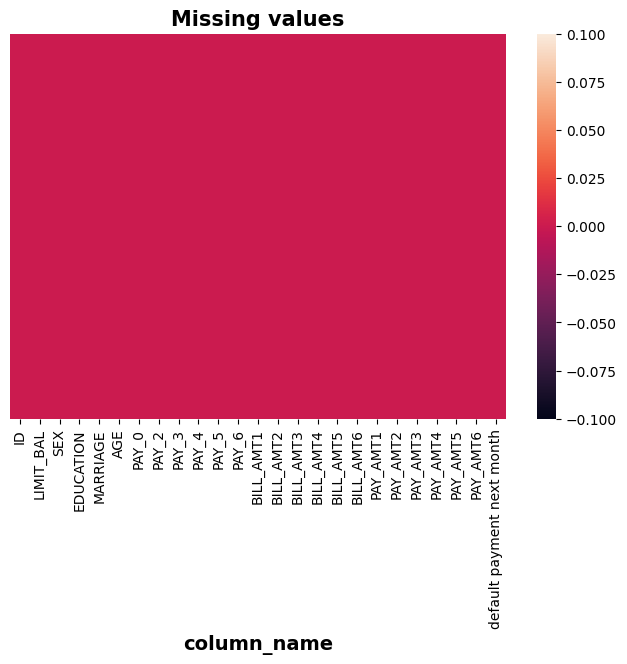

In [10]:
# Visualizing the missing values with heat map
plt.figure(figsize=(8, 5))
sns.heatmap(card_data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values",fontweight="bold",size=15)
plt.show()

In [11]:
card_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**Understandinding variables:**

**Variables description:**

* ID: unique ID of each client
* LIMIT_BAL:Amount of the given credit(NT dollar),It includes both the individual consumer credit and his/her family credit
*Gender:1=male,2=female
*Education:1=graduate school,2=university,3=high school,4=others
*Marital status:1=married,2=single,3=others
*Age:age in years


**History of past payment:**

The measurement scale for the repayment status is:
-2=no consumption,-1=paid in full,0=paid minimum only,1=payment delay for one month,2=payment delay for two months.....
* PAY_0:repayment status in September 2005
* PAY_2:repayment status in August 2005
* PAY_3:repayment status in July 2005
* PAY_4:repayment status in June 2005
* PAY_5:repayment status in May 2005
* PAY_6:repayment status in April 2005
 

**Amount of bill statement(NT dollar):**
 
BILL_AMT1: Amount of bill statement in September, 2005

BILL_AMT2: Amount of bill statement in August, 2005

BILL_AMT3: Amount of bill statement in July, 2005

BILL_AMT4: Amount of bill statement in June, 2005

BILL_AMT5: Amount of bill statement in May, 2005

BILL_AMT6: Amount of bill statement in April, 2005

**Amount of previous payment(NT dollar)**


PAY_AMT1: Amount of previous payment in September, 2005

PAY_AMT2: Amount of previous payment in August, 2005

PAY_AMT3: Amount of previous payment in July, 2005

PAY_AMT4: Amount of previous payment in June, 2005

PAY_AMT5: Amount of previous payment in May, 2005

PAY_AMT6: Amount of previous payment in April, 2005

default payment next month: Default payment (1=yes, 0=no)

**Data wrangling:**

In [12]:
# Write your code to make your dataset analysis ready.
#renaming dependendent Variable
card_data.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
#Changing name of some columns for simplicity and better understanding
card_data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
card_data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
card_data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
#Dropping ID column because there is no use of ID further.
card_data.drop('ID',axis=1,inplace=True)
     


In [13]:
#create a copy
card_data1=card_data.copy()

In [14]:
#check the first five rows
card_data1.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0      20000    2          2         1   24         2        2       -1   
1     120000    2          2         2   26        -1        2        0   
2      90000    2          2         2   34         0        0        0   
3      50000    2          2         1   37         0        0        0   
4      50000    1          2         1   57        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -2  ...             0             0             0   
1        0        0  ...          3272          3455          3261   
2        0        0  ...         14331         14948         15549   
3        0        0  ...         28314         28959         29547   
4        0        0  ...         20940         19146         19131   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0             0          689            0            0            0   
1             0         1000         1000         1000            0   
2          1518         1500         1000         1000         1000   
3          2000         2019         1200         1100         1069   
4          2000        36681        10000         9000          689   

   PAY_AMT_APR  IsDefaulter  
0            0            1  
1         2000            1  
2         5000            0  
3         1000            0  
4          679            0  

[5 rows x 24 columns]

In [15]:
#replacing values with the labels
card_data.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
card_data.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'others',5 : 'others',6 : 'others',0 : 'others'}}, inplace=True)
card_data.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'others',0 : 'others'}}, inplace = True)
card_data.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)
     

In [16]:
#check the first five rows
card_data.head()

LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0      20000  Female  University  Married   24         2        2       -1   
1     120000  Female  University   Single   26        -1        2        0   
2      90000  Female  University   Single   34         0        0        0   
3      50000  Female  University  Married   37         0        0        0   
4      50000    Male  University  Married   57        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -2  ...             0             0             0   
1        0        0  ...          3272          3455          3261   
2        0        0  ...         14331         14948         15549   
3        0        0  ...         28314         28959         29547   
4        0        0  ...         20940         19146         19131   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0             0          689            0            0            0   
1             0         1000         1000         1000            0   
2          1518         1500         1000         1000         1000   
3          2000         2019         1200         1100         1069   
4          2000        36681        10000         9000          689   

   PAY_AMT_APR  IsDefaulter  
0            0          Yes  
1         2000          Yes  
2         5000           No  
3         1000           No  
4          679           No  

[5 rows x 24 columns]

**Exploratory Data Analysis:**

**Univariate Analysis:**

**1.Visualization of Defaulter v/s Non-Defaulter**

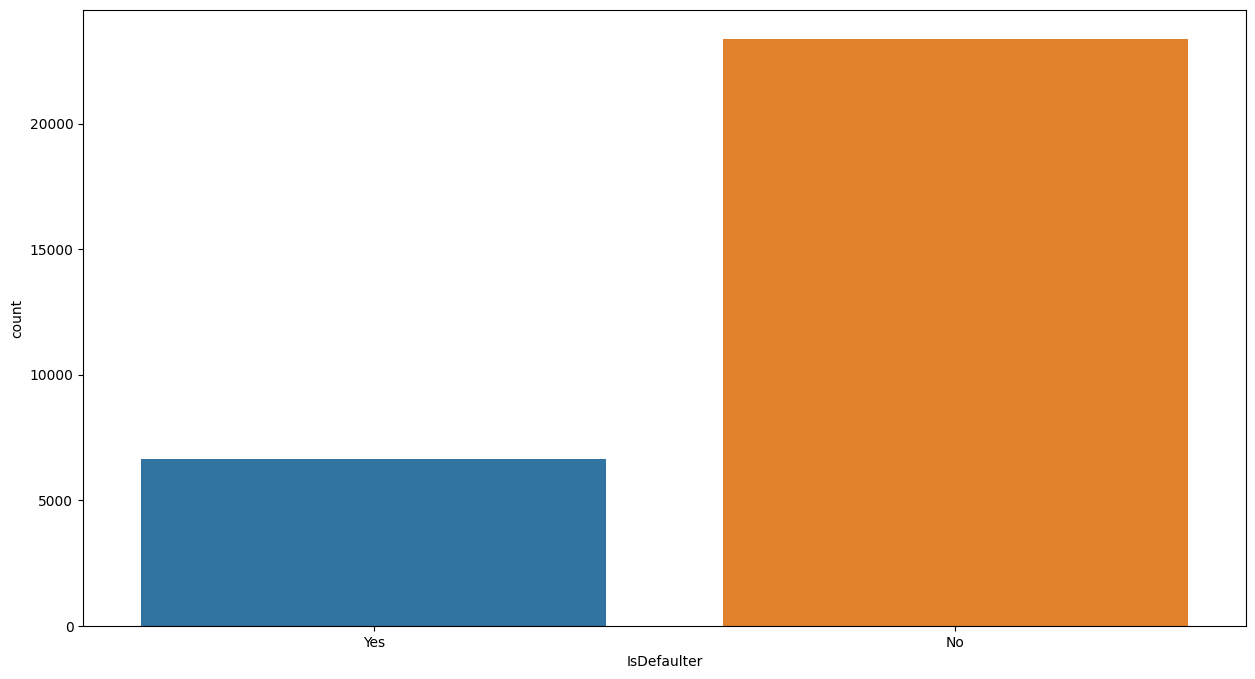

In [17]:
#Visualizing of Default(Target Variable) using Countplot
plt.figure(figsize=(15,8))
sns.countplot(x='IsDefaulter',data=card_data)
plt.show()


In chart Yes means payment will default and No means payment will not default.

From above chart I observed that the number of defaulters is less than the non-defaulters.

**2.Visualizing credit card holders gender wise**

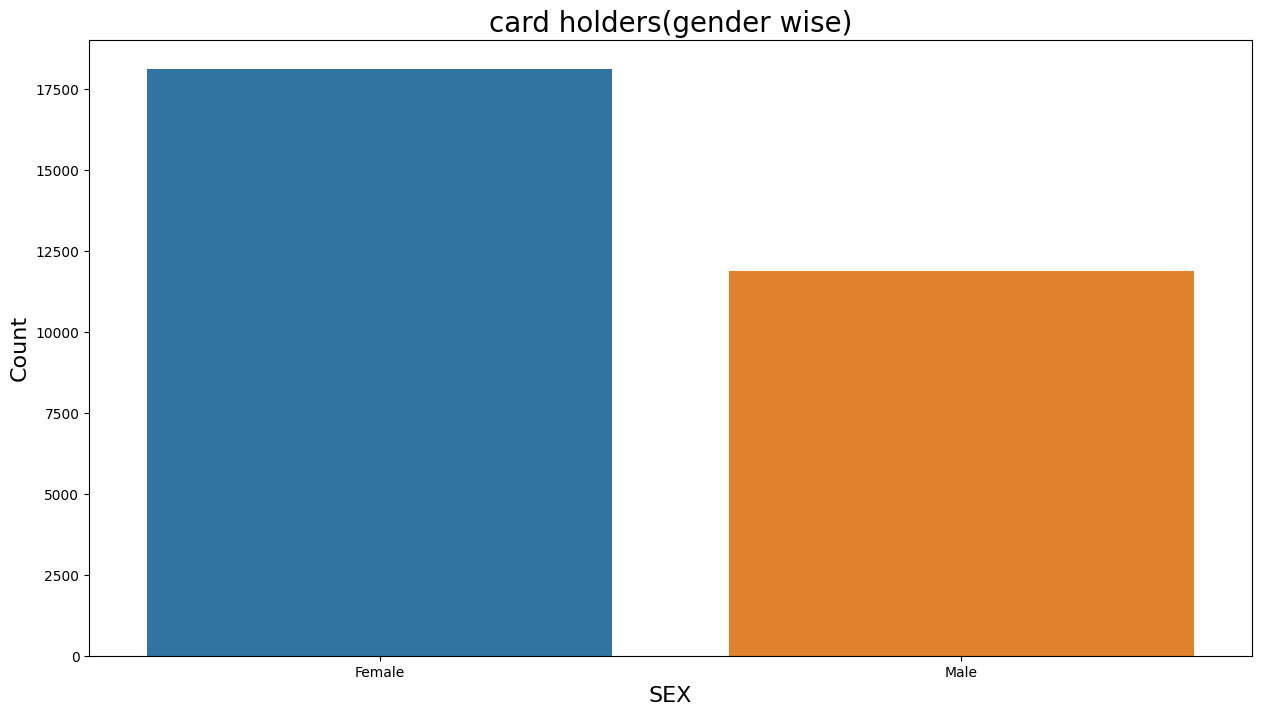

In [18]:
#Using Count plot to check Gender ratio from SEX column in card_data
plt.figure(figsize=(15,8))
sns.countplot(x='SEX',data=card_data)
plt.title('card holders(gender wise)',size=20)
plt.xlabel('SEX',size=16)
plt.ylabel('Count',size=16)
plt.show()

From above chart I observed that female credit card holders is more than male.

suggestion: Bank can give some offers to male customers and at the same time they should take care of their Female customers to increse their business.

**3.visualization of credit card holders according to educational qualifications**

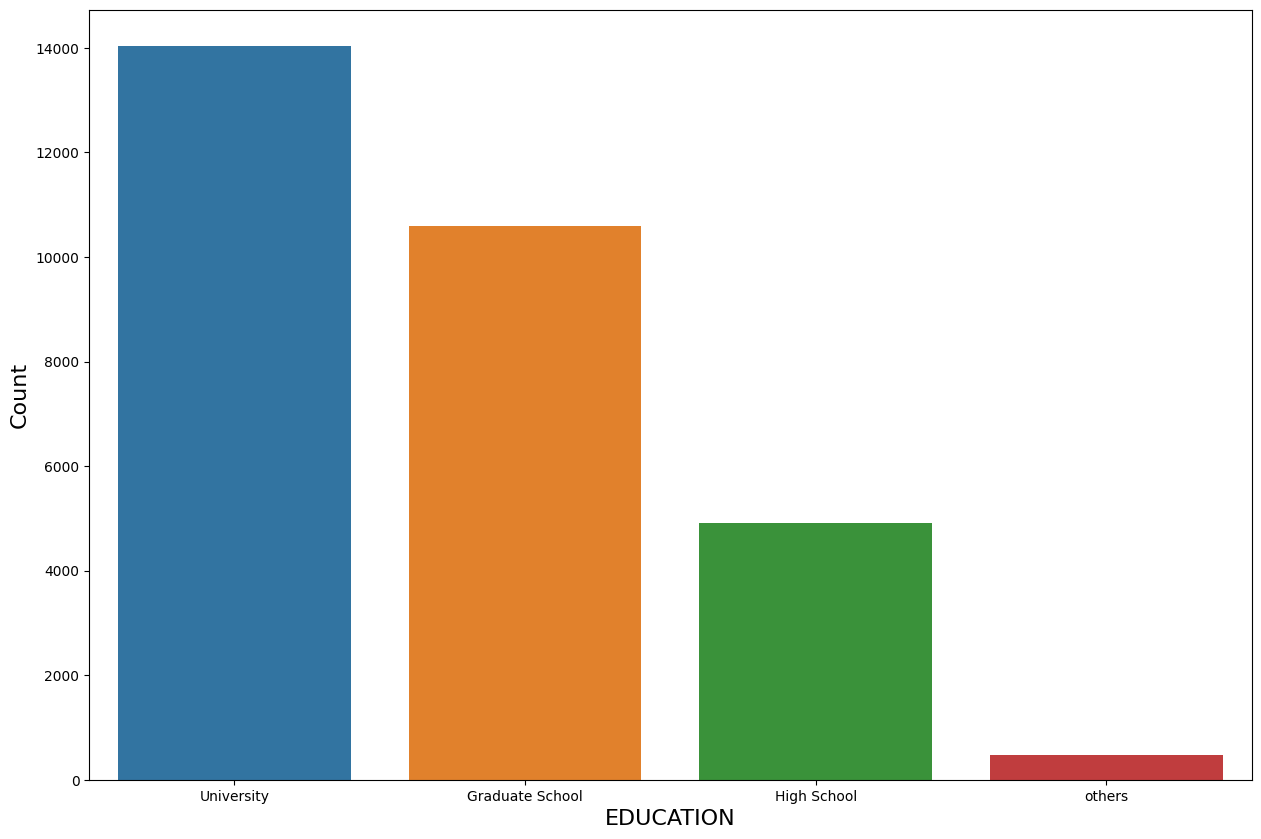

In [19]:
# visualization of card holders according to education
plt.figure(figsize=(15,10))
sns.countplot(x='EDUCATION',data=card_data)
plt.xlabel('EDUCATION',size=16)
plt.ylabel('Count',size=16)
plt.show()

From above chart I observed that maximum credit card holders from university followed by graduate school.

Suggestion:
As we can see most of the credit card holders from university followed by Graduate school.So bank can target these category people to increase their business and as we know sourse of income for high school candidates are very less so need to make more focus on this group of people.

**4.visualization of credit card holders according to marital status**

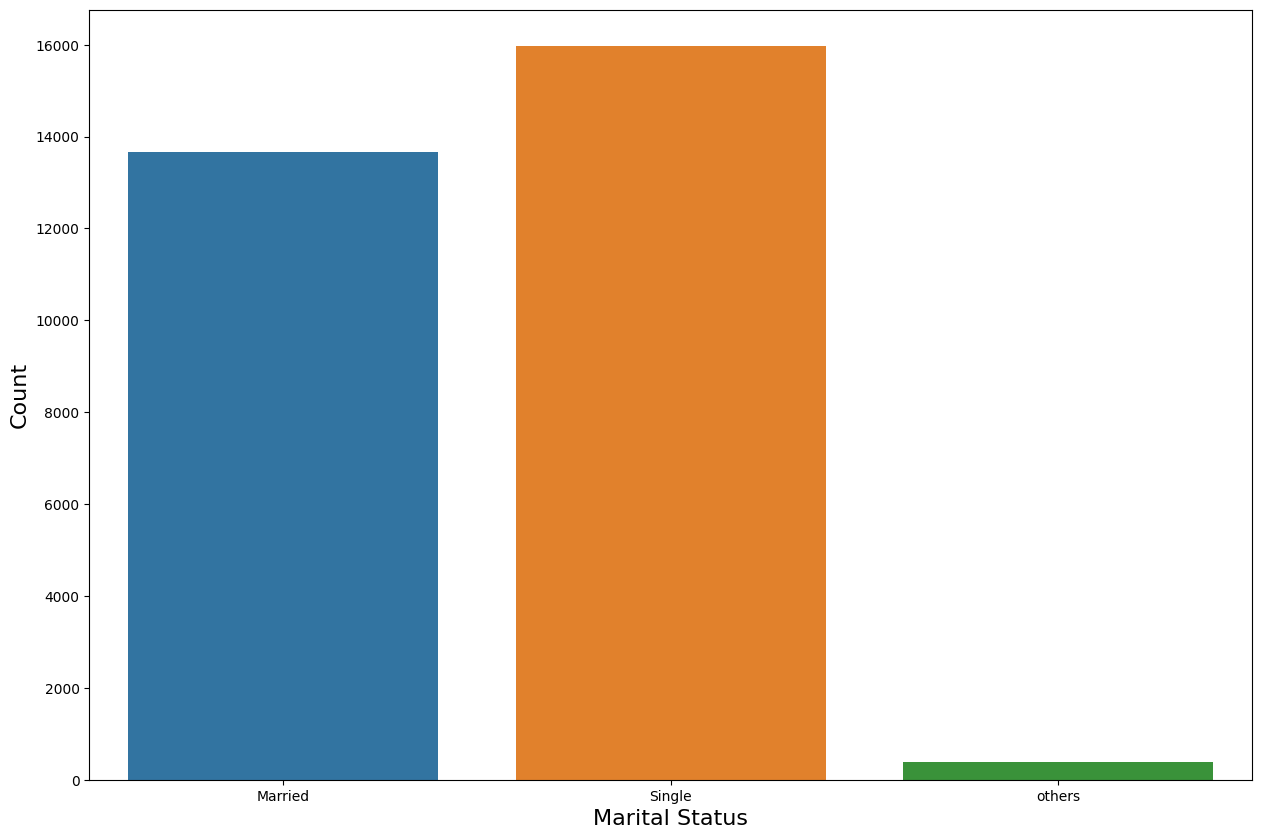

In [20]:
# visualization of credit card holders on their marital status
plt.figure(figsize=(15,10))
sns.countplot(x='MARRIAGE',data=card_data)
plt.xlabel('Marital Status',size=16)
plt.ylabel('Count',size=16)
plt.show()
     


From above chart I analyzed that maximum credit card holders are single.

suggestion:
          Single people make lots of expenditure than married people because they will use credit card more.Hence targetting single people surely increase the business.

**5.visualization of credit card holders corresponding to their age**

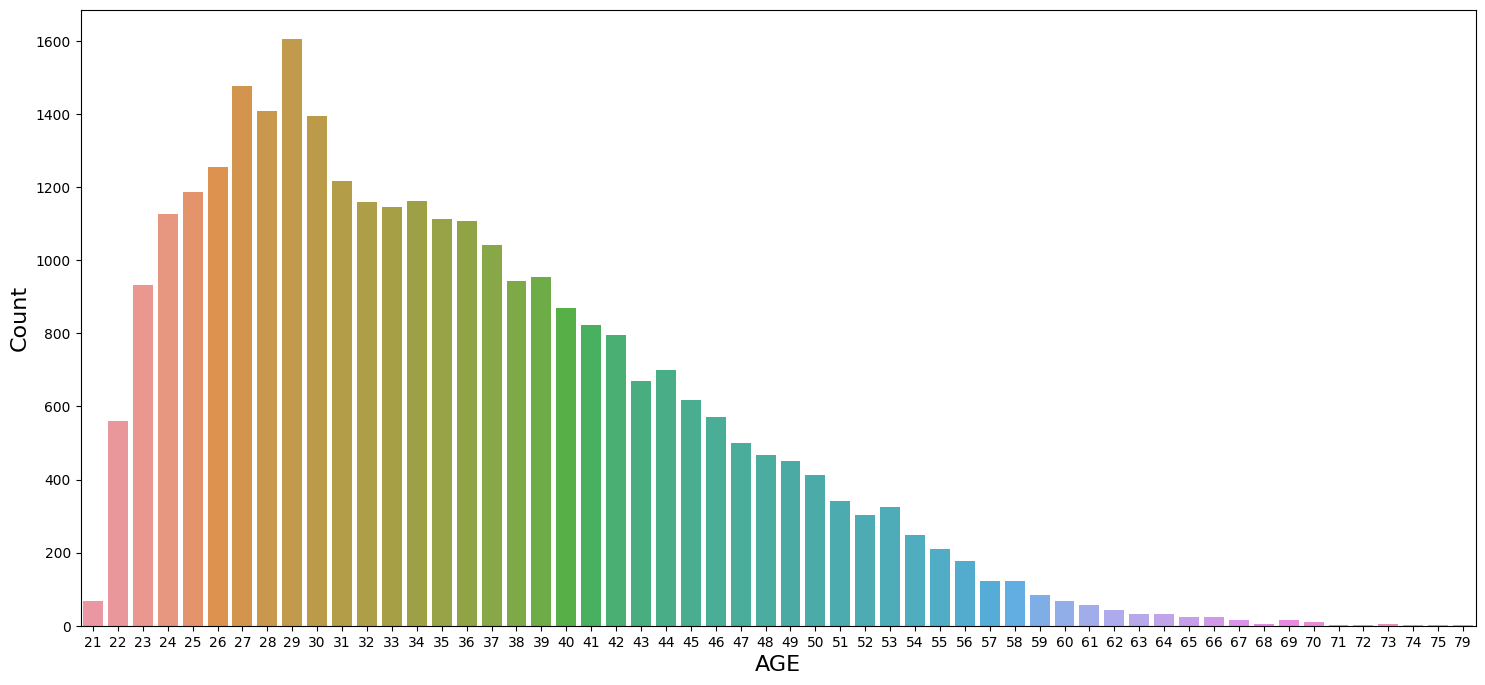

In [21]:
#Analyzing credit_card holders depending on their age
plt.figure(figsize=(18,8))
sns.countplot(x='AGE',data=card_data)
plt.xlabel('AGE',size=16)
plt.ylabel('Count',size=16)
plt.show()
     


After analzing the above chart I observed that most of the credit card holders range between 26 to 30 years.

Suggestion:Youngsters are using credit card more so we will mainly focus on them to increase our business.

**Bivariate Analysis**

**6.Limit Balance v/s Defaulter**

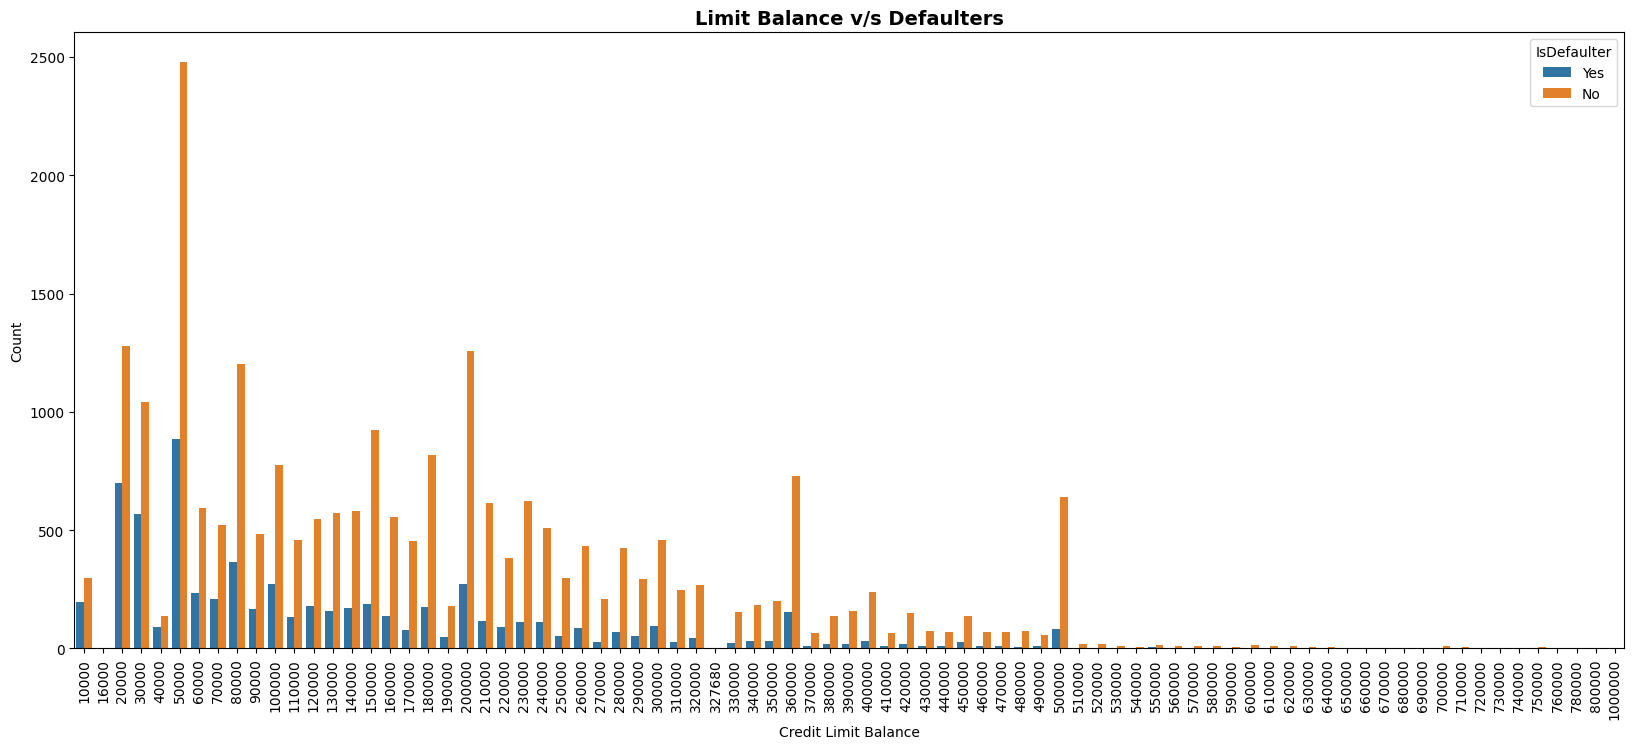

In [22]:
#visualizing limit balance v/s Defaulter
plt.figure(figsize = (20,8))
sns.countplot(x = 'LIMIT_BAL',hue = 'IsDefaulter',data = card_data)
plt.xticks(rotation = 90)
plt.title('Limit Balance v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Credit Limit Balance',fontsize = 10)
plt.ylabel('Count',fontsize=10)
plt.show()


From above chart I observed that maximum numbers of defaulters are credit limit balance is 20000,30000 and 50000.customers having credit limit balance 50000 are more likely to default among all others.

suggestion:
            customers with credit limit 50000 are more likely to default so bank should charge them in case of default and may also reduce their limit to prevent any kind of loss to the company.

**7.SEX v/s Defaulter**

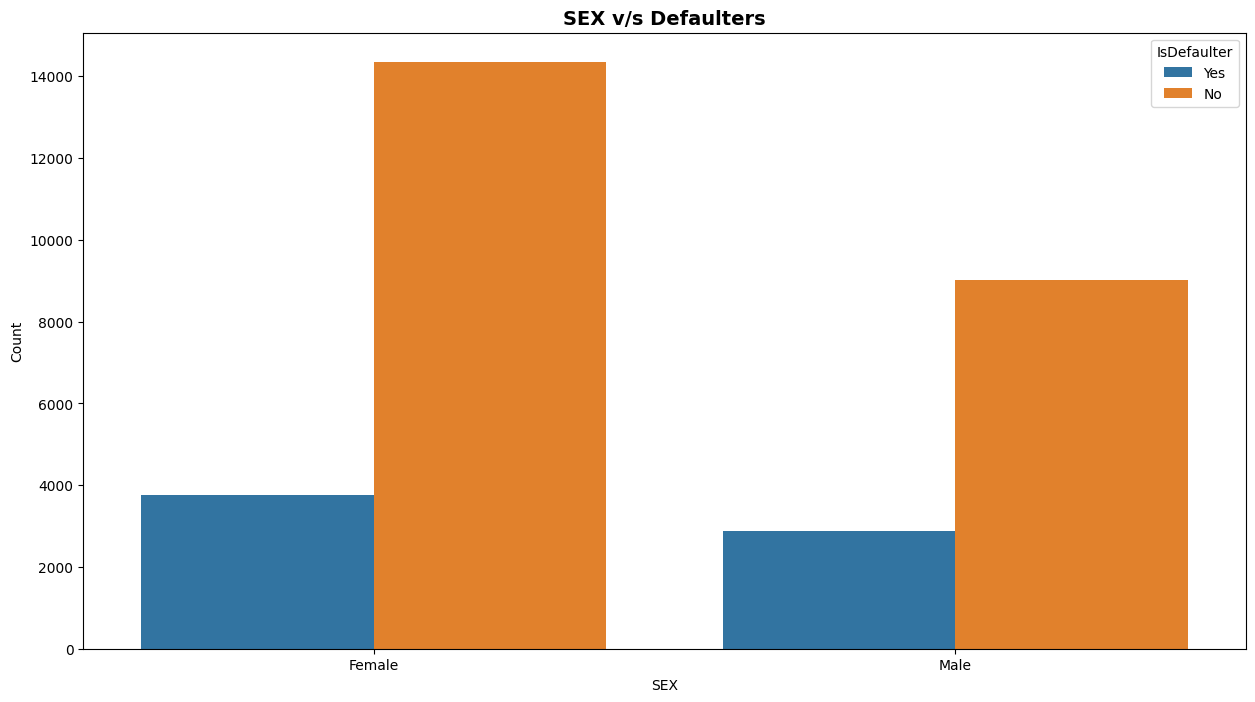

In [23]:
#visualizing SEX v/s Defaulter
plt.figure(figsize = (15,8))
sns.countplot(x = 'SEX',hue = 'IsDefaulter',data = card_data)
plt.title('SEX v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('SEX',fontsize = 10)
plt.ylabel('Count',fontsize=10)
plt.show()

From the above chart I observed that maximum numer of credit card holders are
Female.

**8.Education v/s Defaulter:**

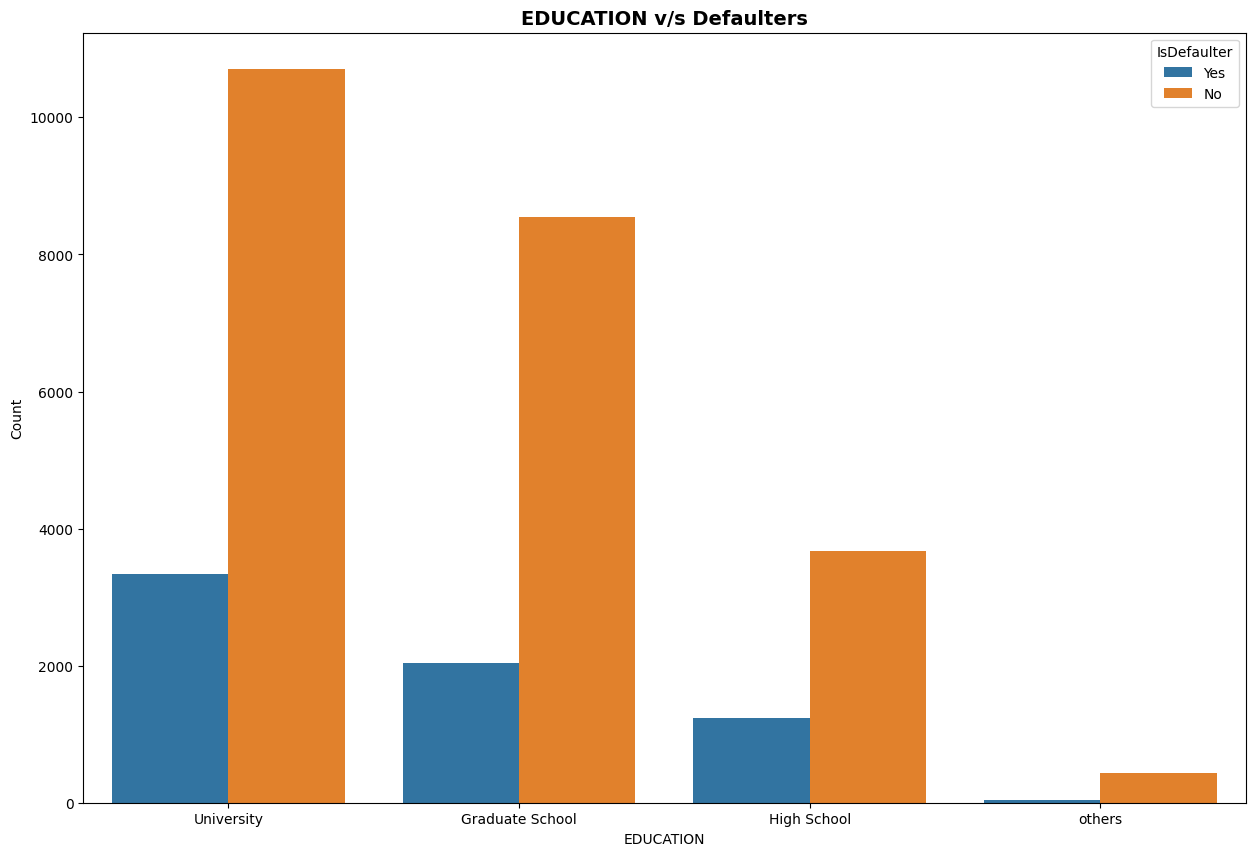

In [24]:
# visualizing education v/s Defaulter
plt.figure(figsize = (15,10))
sns.countplot(x = 'EDUCATION',hue = 'IsDefaulter',data = card_data)
plt.title('EDUCATION v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('EDUCATION',fontsize = 10)
plt.ylabel('Count',fontsize=10)
plt.show()

we know that maximum number of credit card holders are from university.

sugggestion:
 so we can  target on university people to increase our business.

**9.Marriage v/s Defaulter**

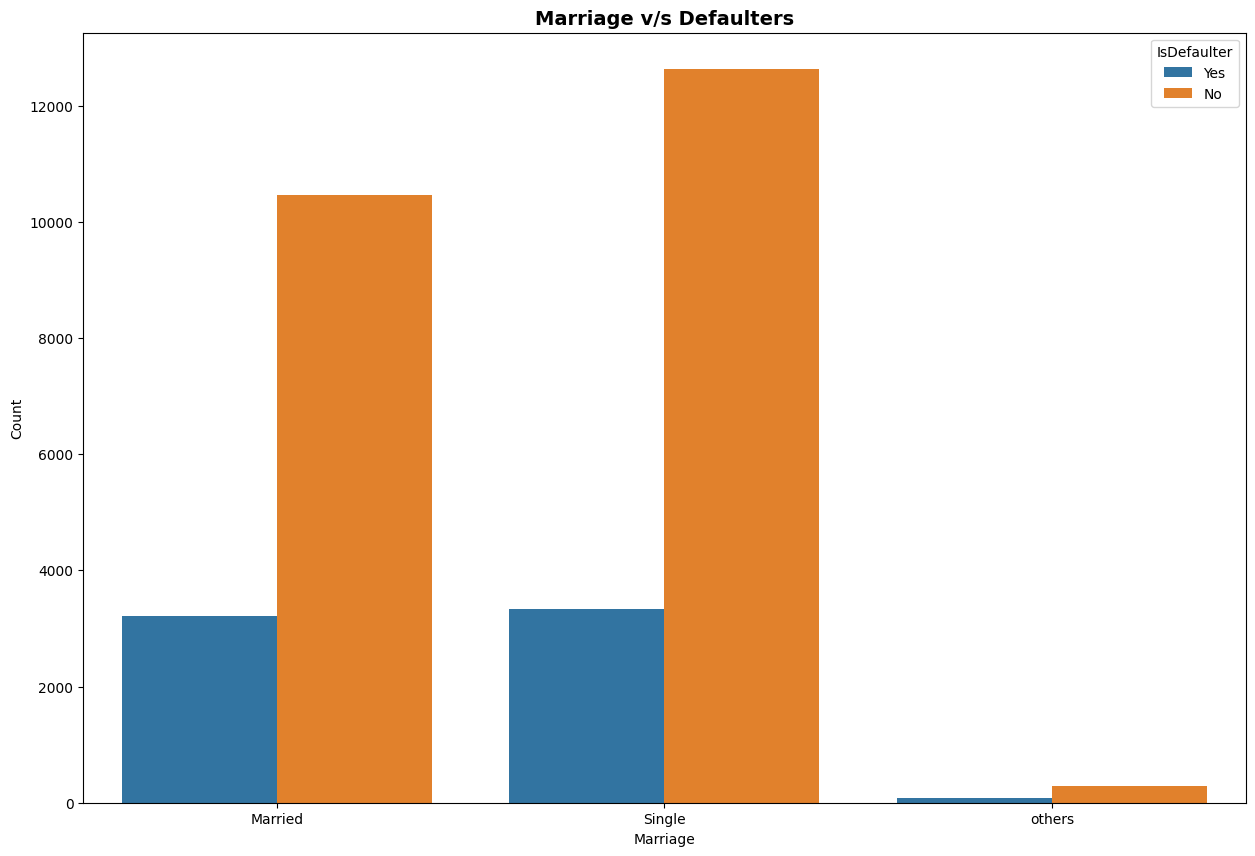

In [25]:
#visualizing marriage v/s Defaulter
plt.figure(figsize = (15,10))
sns.countplot(x = 'MARRIAGE',hue = 'IsDefaulter',data = card_data)
plt.title('Marriage v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Marriage',fontsize = 10)
plt.ylabel('Count',fontsize=10)
plt.show()
     

From above chart I observed that married people having higher default ratio.

suggestion:

 Married people having high default ratio than single and as we can see that most of the non-defaulter/maximum credit card holders belongs to Single category so we can mainly focus on them to increase the business.

**10.Age v/s Defaulter:**

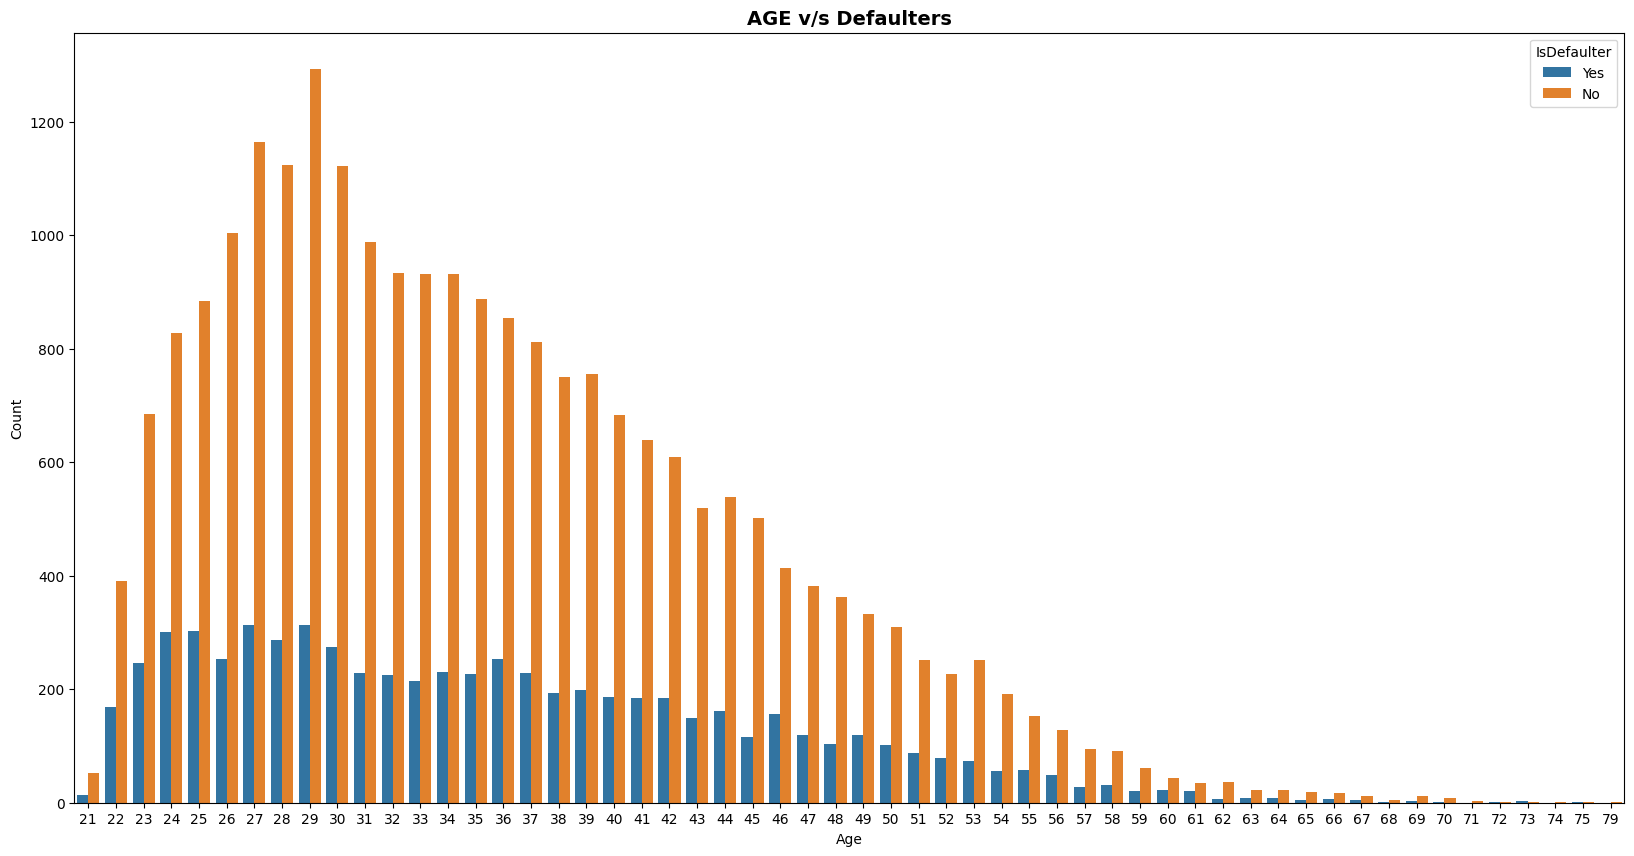

In [26]:
#visualizing Age v/s Defaulter
plt.figure(figsize = (20,10))
sns.countplot(x = 'AGE',hue = 'IsDefaulter',data = card_data)
plt.title('AGE v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Age',fontsize = 10)
plt.ylabel('Count',fontsize=10)
plt.show()

From the above chart I observed that Most of the people ranges between 25 and 40 years old.

suggestion:

There are more number of defaulters  are between the age of 20 to 25 and greater than 60 years.Proper review has to b e done before issueing the credit cards.
        



**11.Monthly wise repayment v/s Default:**

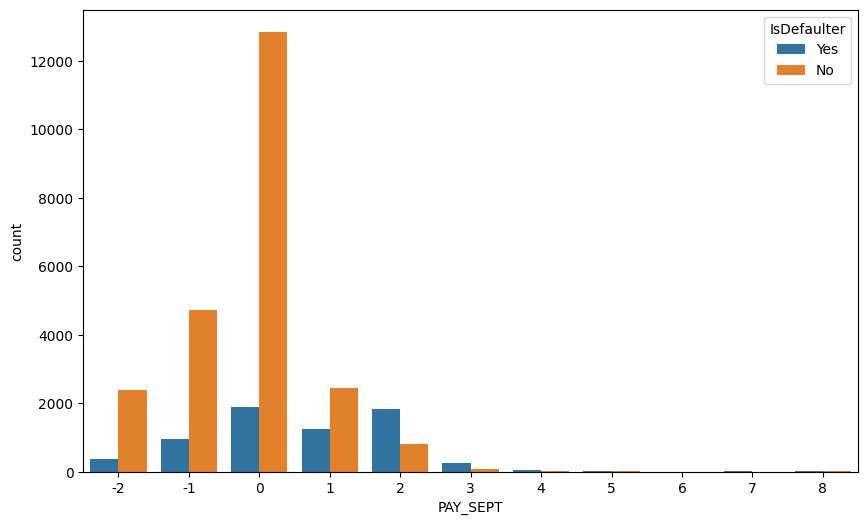

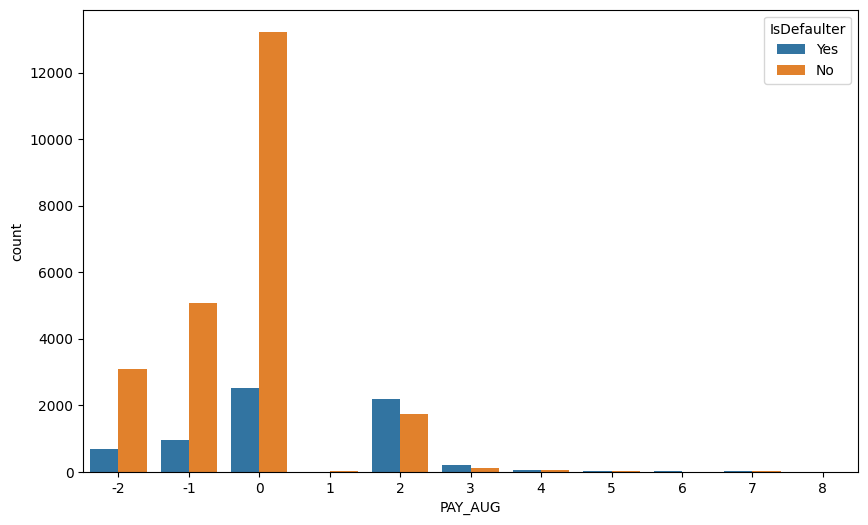

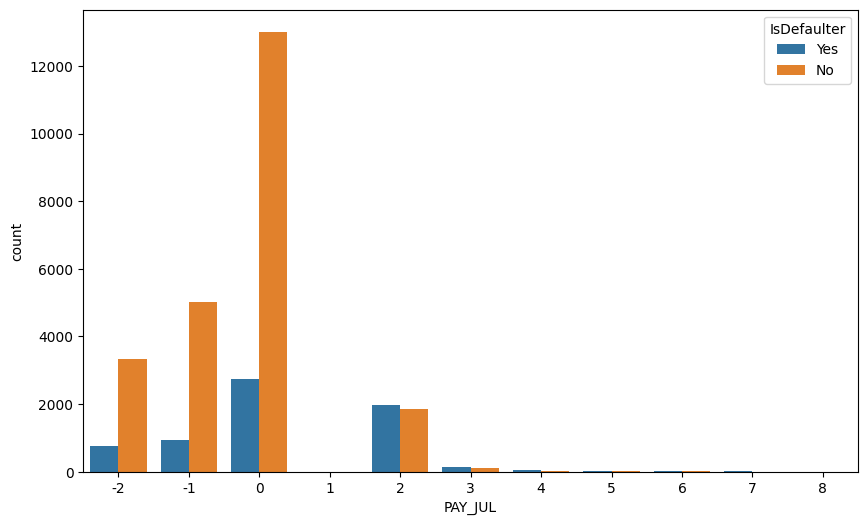

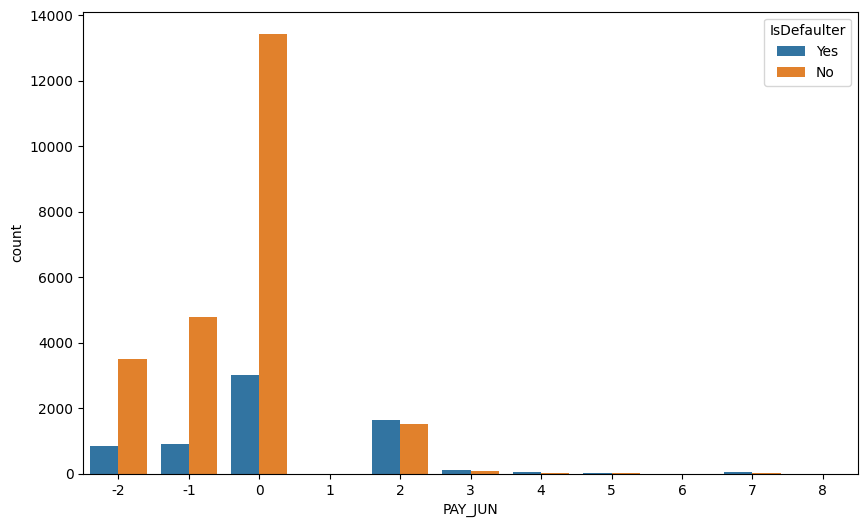

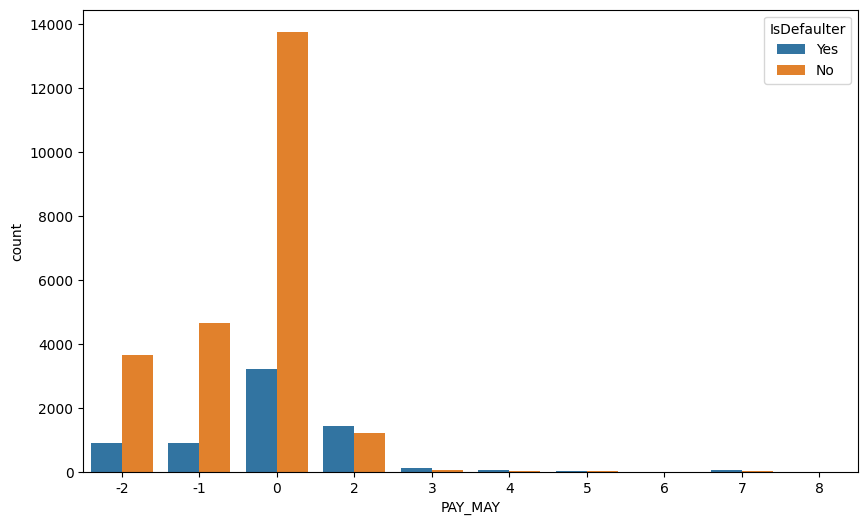

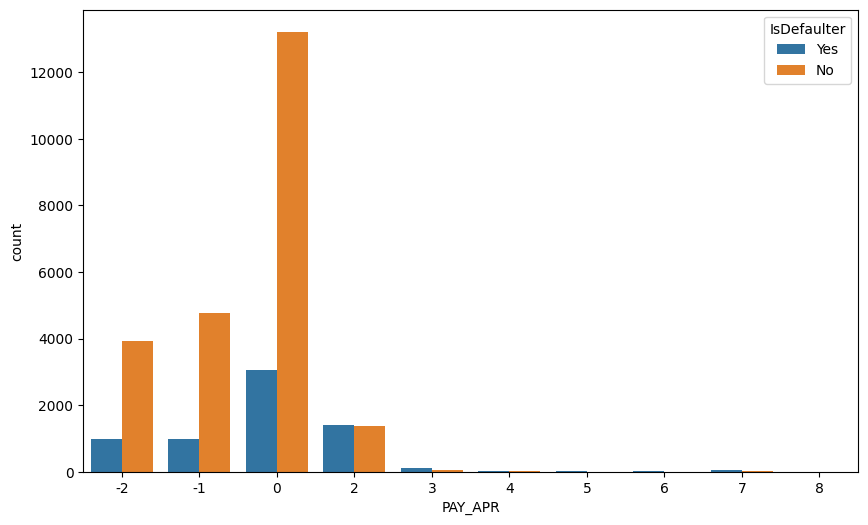

In [27]:
#visualising the monthly wise repayment v/s default
repay_column = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in repay_column:
  plt.figure(figsize=(10,6))
  sns.countplot(x = col, hue = 'IsDefaulter', data = card_data)

From above charts I observed that customers who are paying minimum amount only having higher chance of being default.Customers in this category are using credit card mostly. 

**12.Monthly billing amount v/s default**

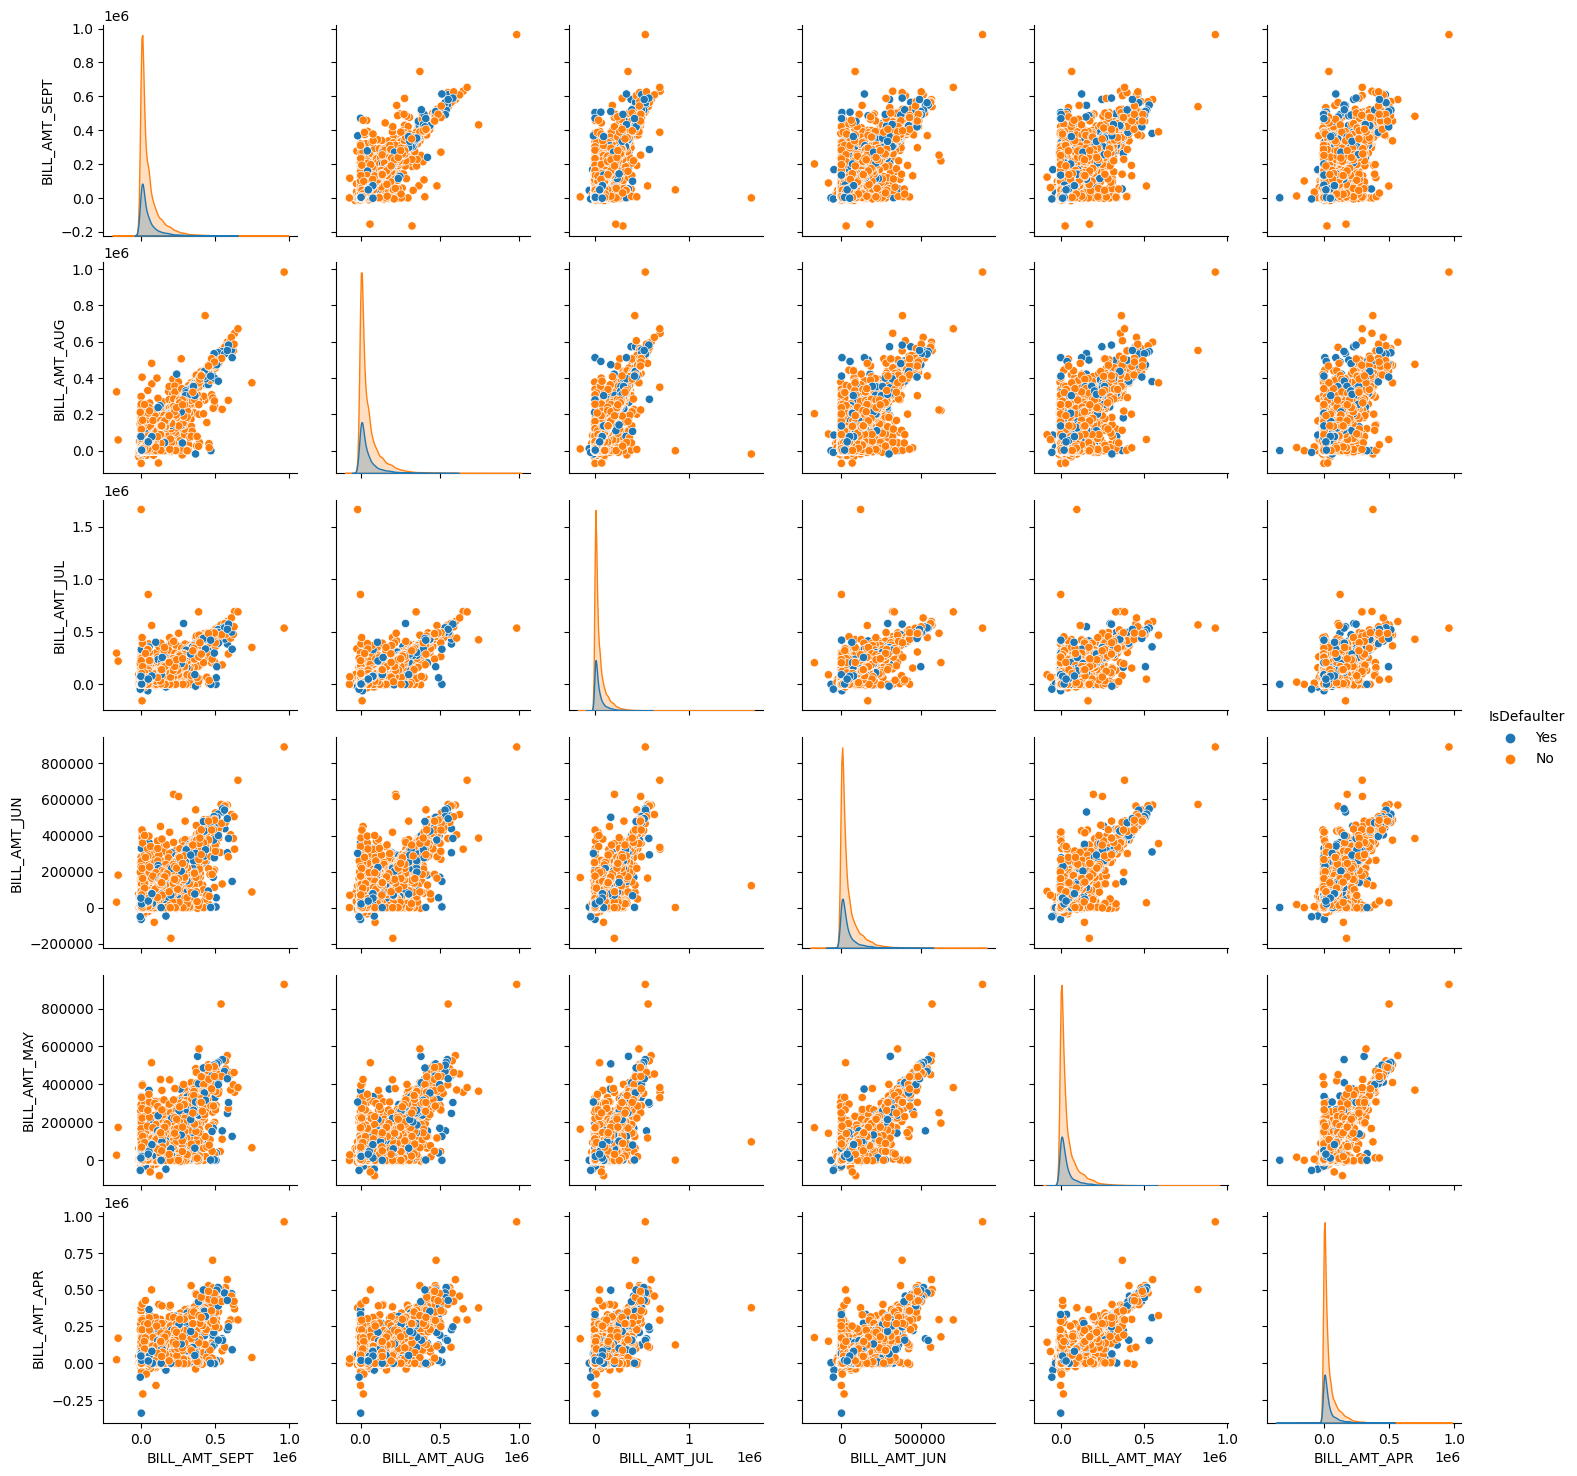

In [28]:
#visualising monthly billing amount v/s default
bill_amount_data = card_data[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR','IsDefaulter']]
sns.pairplot(data = bill_amount_data,hue='IsDefaulter')
     

From the above seaborn pairplot I observed that previous month bill amount is linearly correlated which means users are similar amount each month.

**Correlation heatmap:**

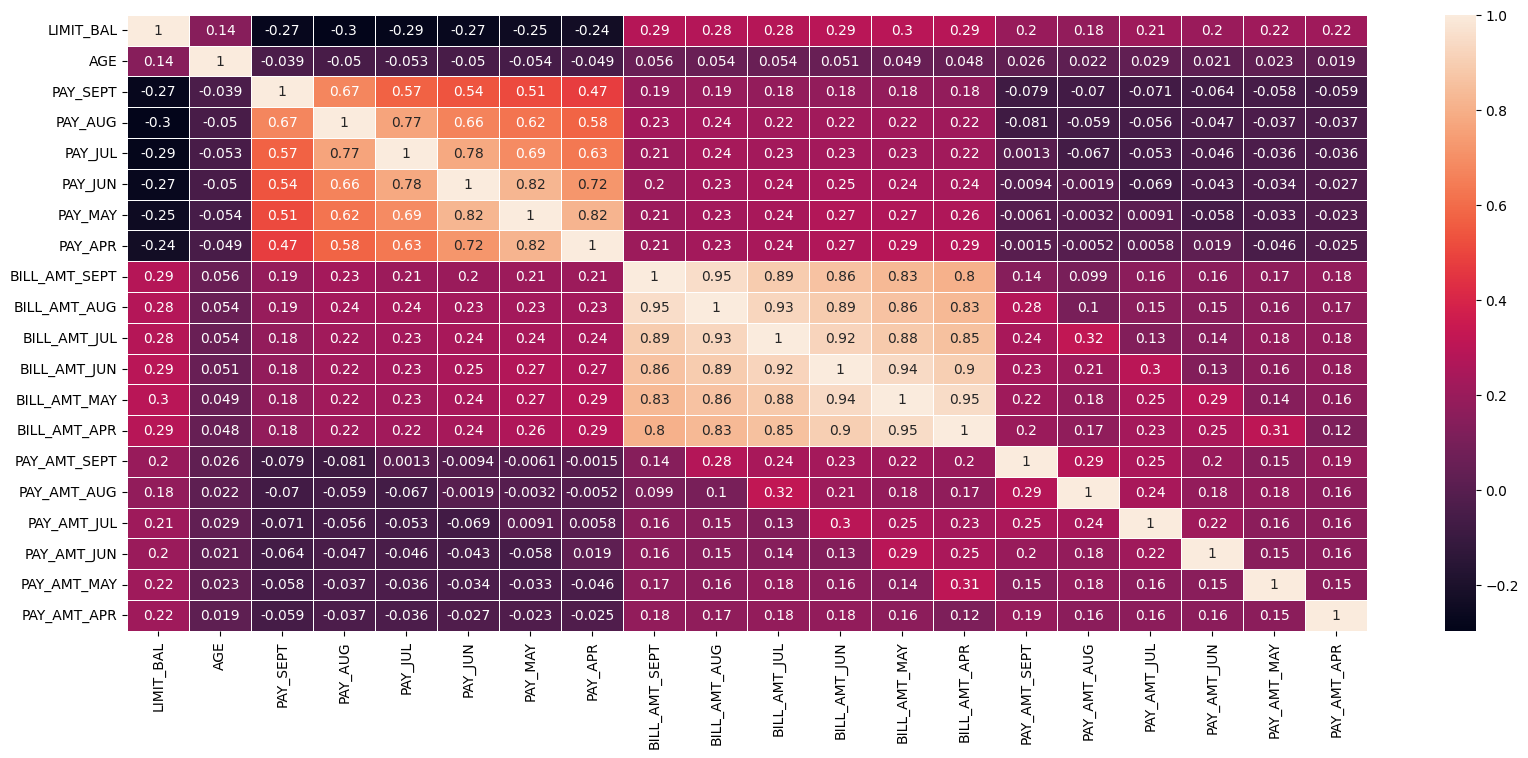

In [29]:
# Correlation Heatmap visualization code
plt.figure (figsize= (20,8))
sns.heatmap(card_data.corr(),linewidths=.5,annot=True)
plt.show()

From the above heatmap I observed that the features PAY_MAY & PAY_APR,BILL_AMT_MAY & BILL_AMT_APR are highly correlated to each other.But here we are not going to drop anyone of them because they contains the transaction details of the customer.

**Pair plot:**

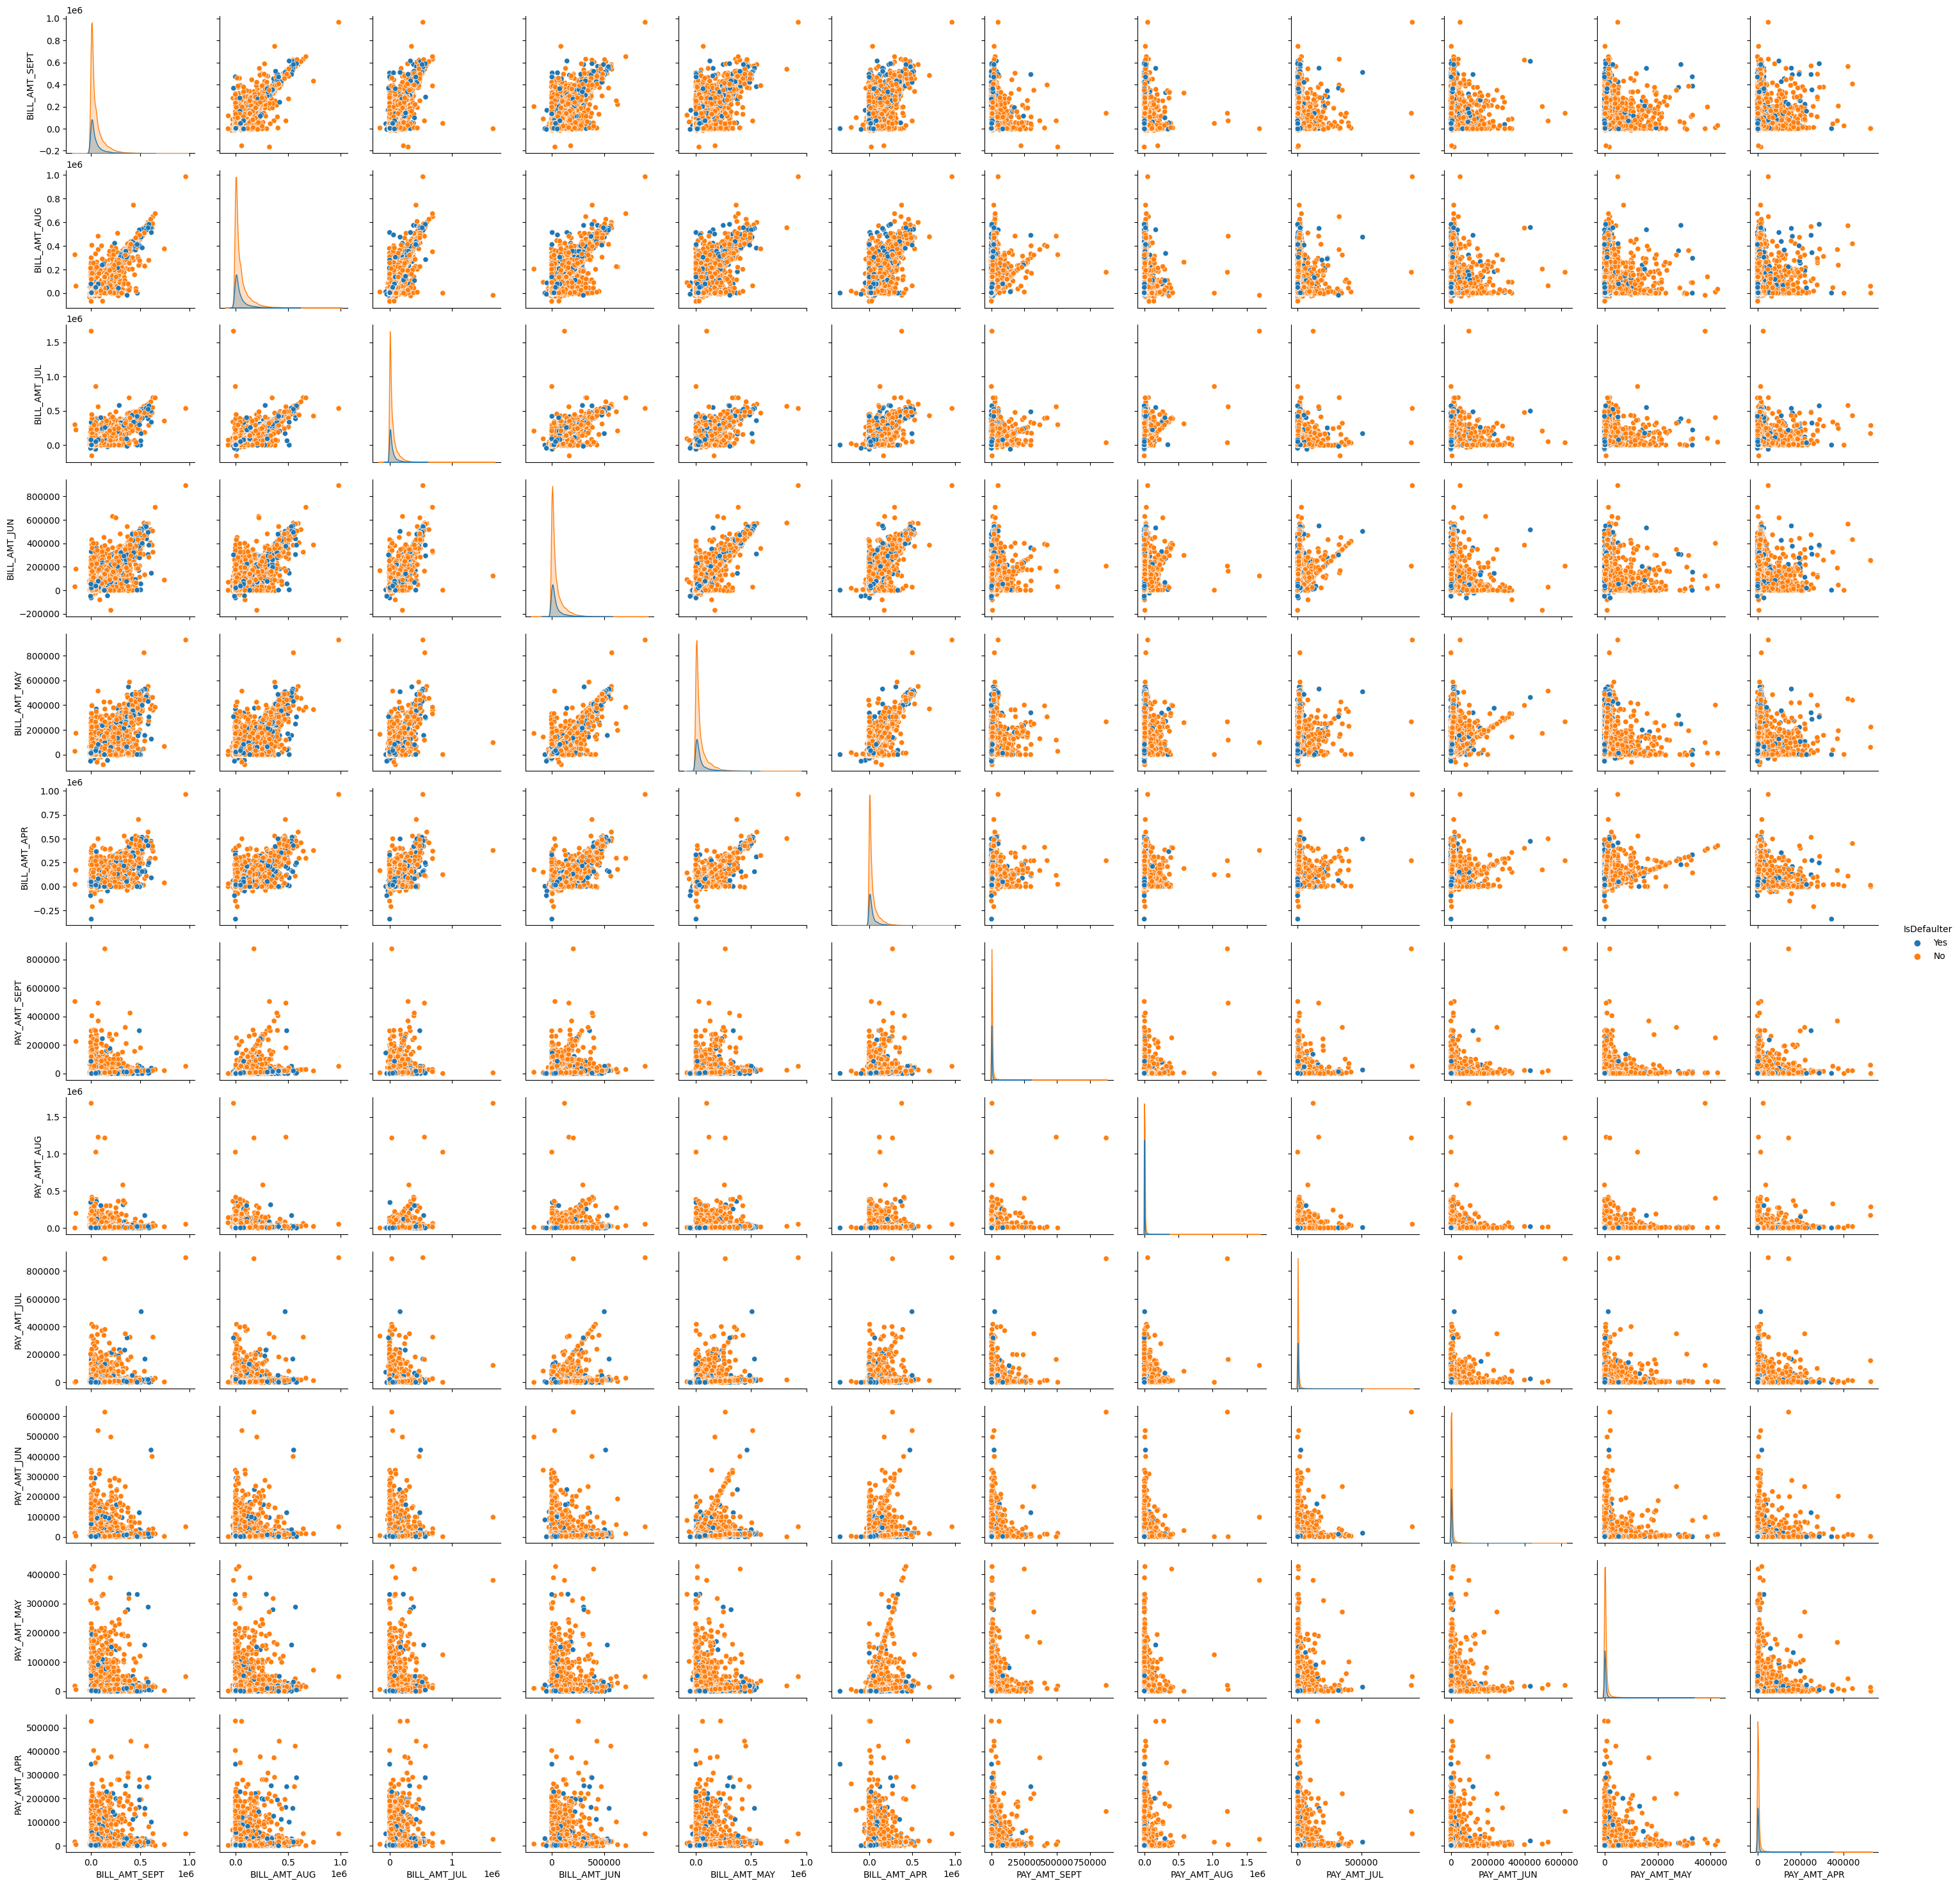

In [30]:
#visualizing pair plot
sns.pairplot(card_data,vars=card_data.columns[11:-1], kind='scatter',hue= 'IsDefaulter')
plt.show()

From the above pair plot I observed that users are spending similar amount each month,where as payment amount is different each month.

**Feature engineering and Data pre-processing:**

**Handling missing values:**

In [31]:
# finding Missing Values
card_data1.isnull().sum()


LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_SEPT         0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
BILL_AMT_SEPT    0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
PAY_AMT_SEPT     0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
IsDefaulter      0
dtype: int64

There are no null values in our data set.

**2.Handling outliers:**

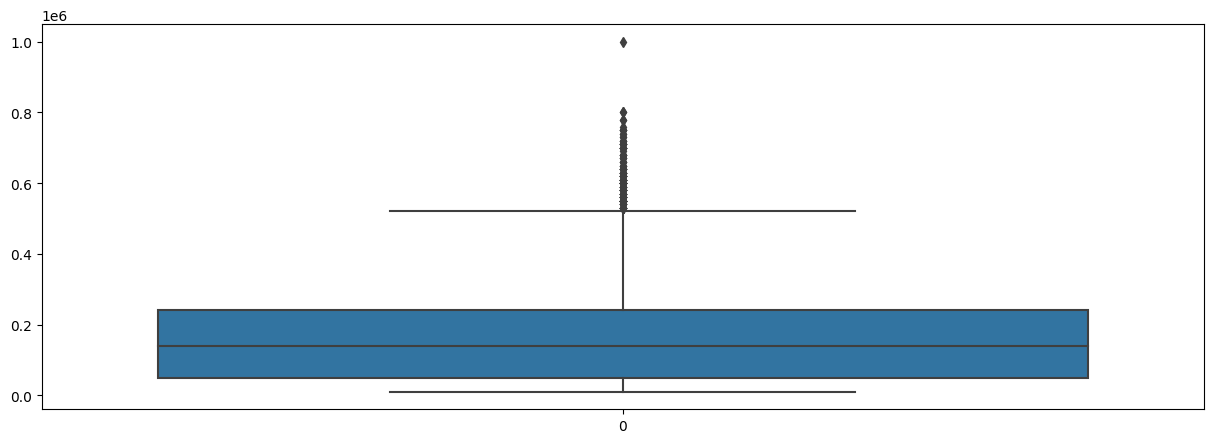

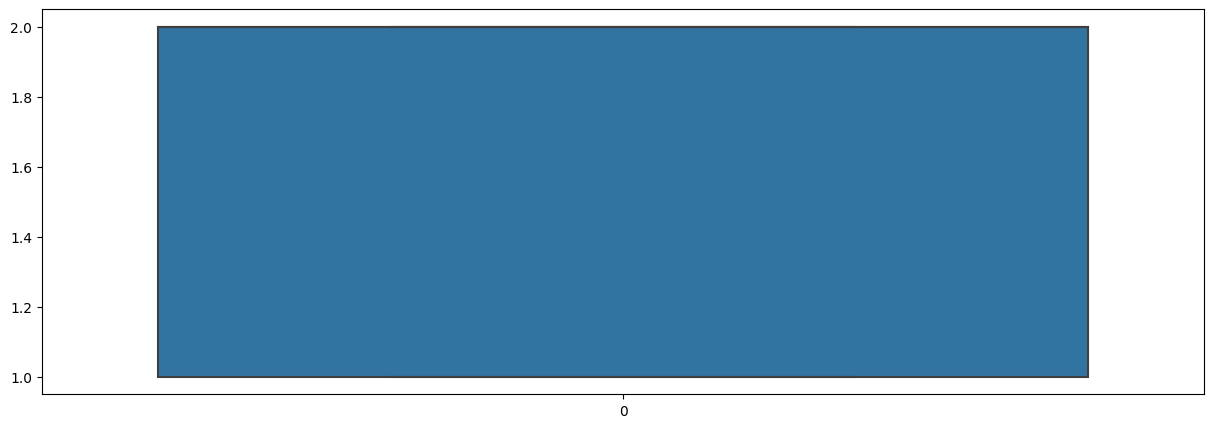

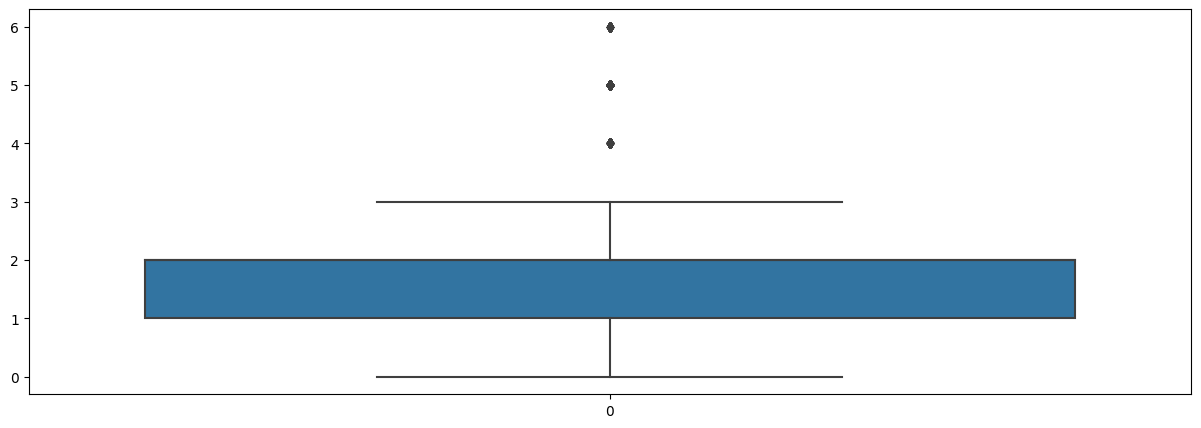

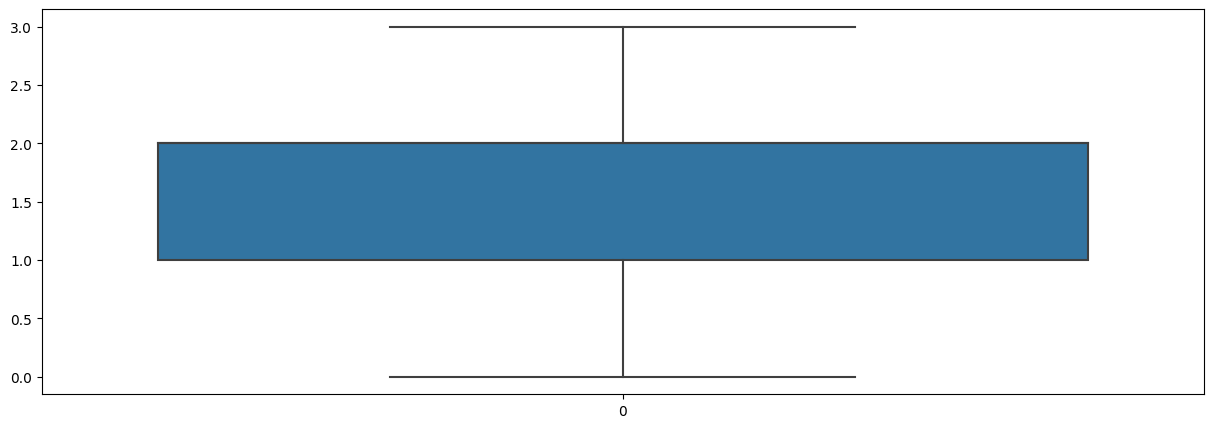

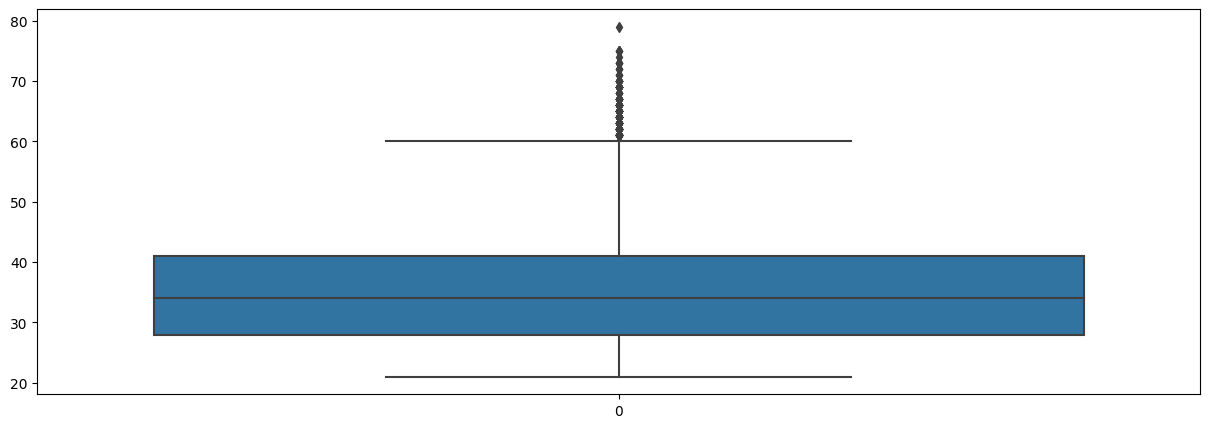

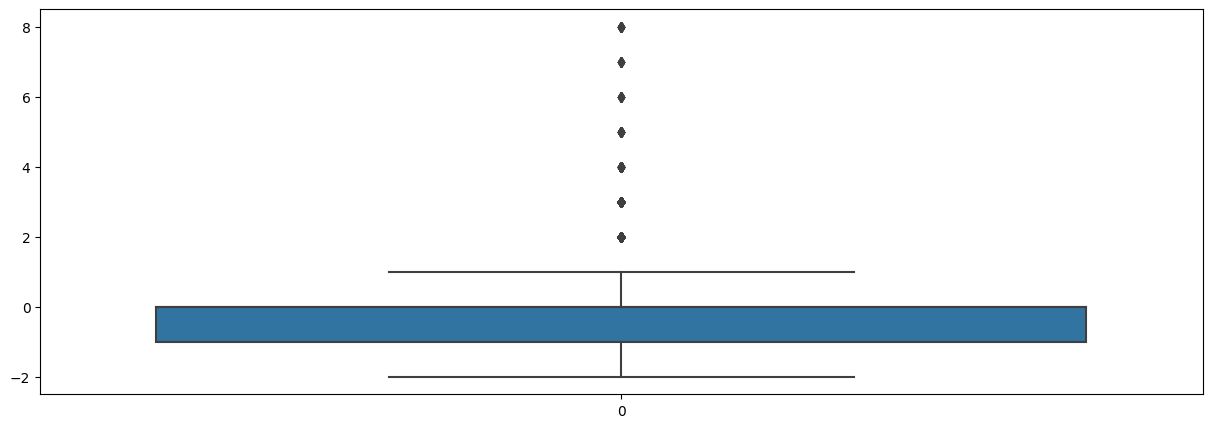

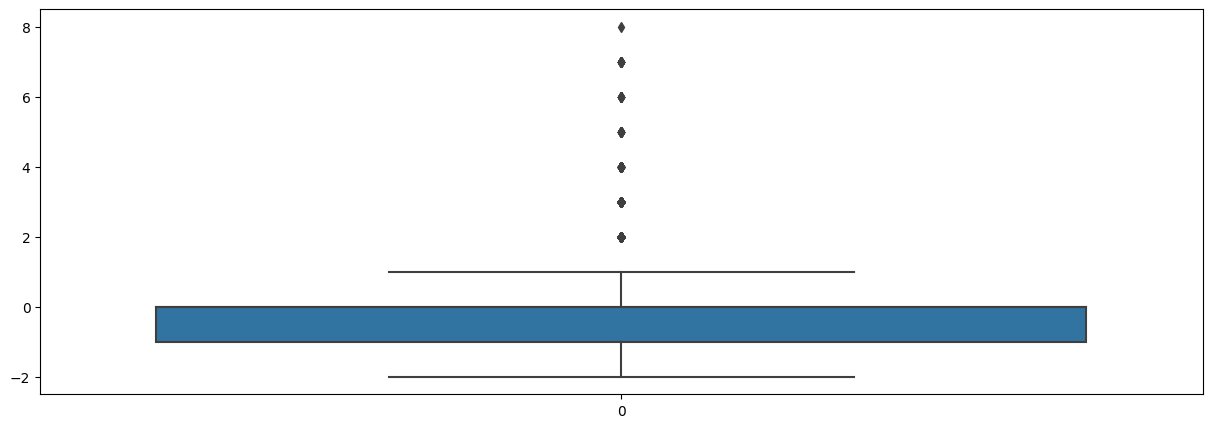

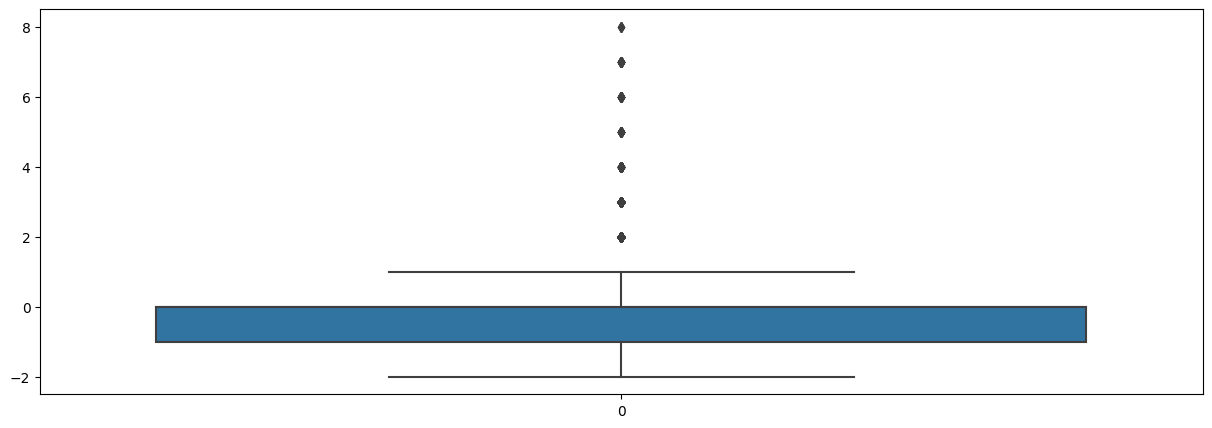

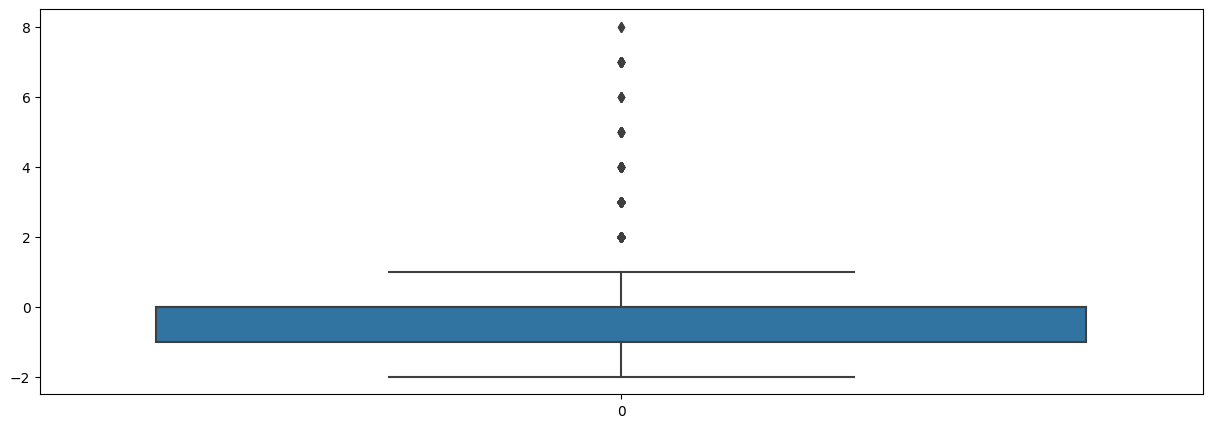

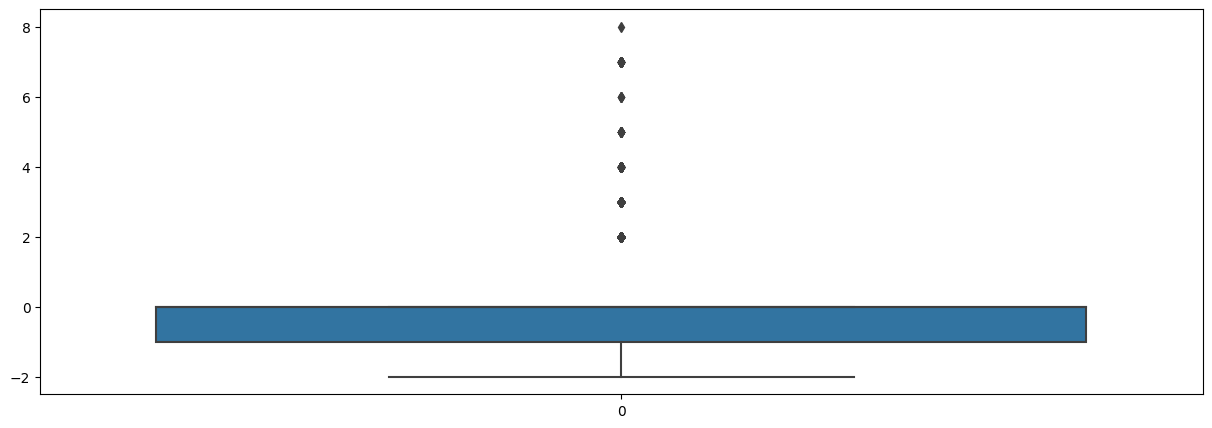

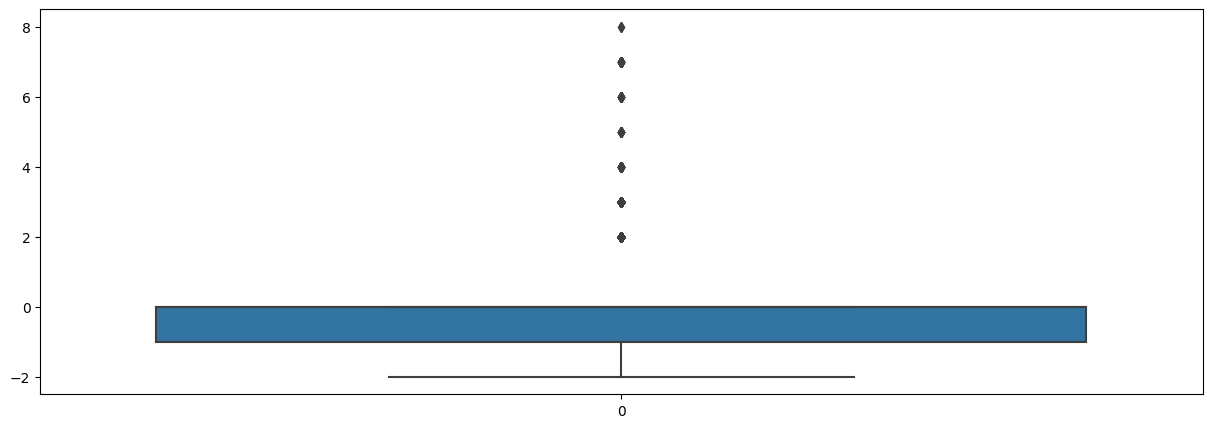

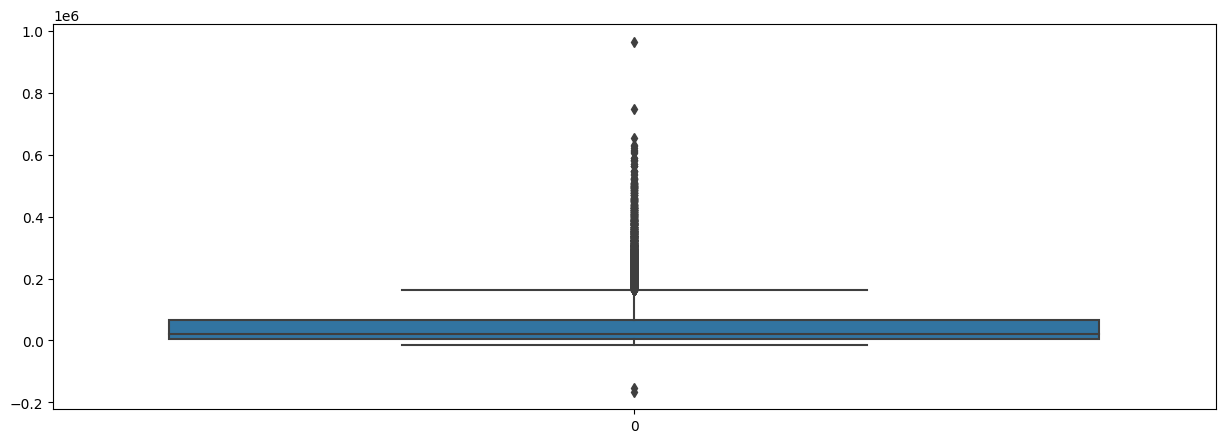

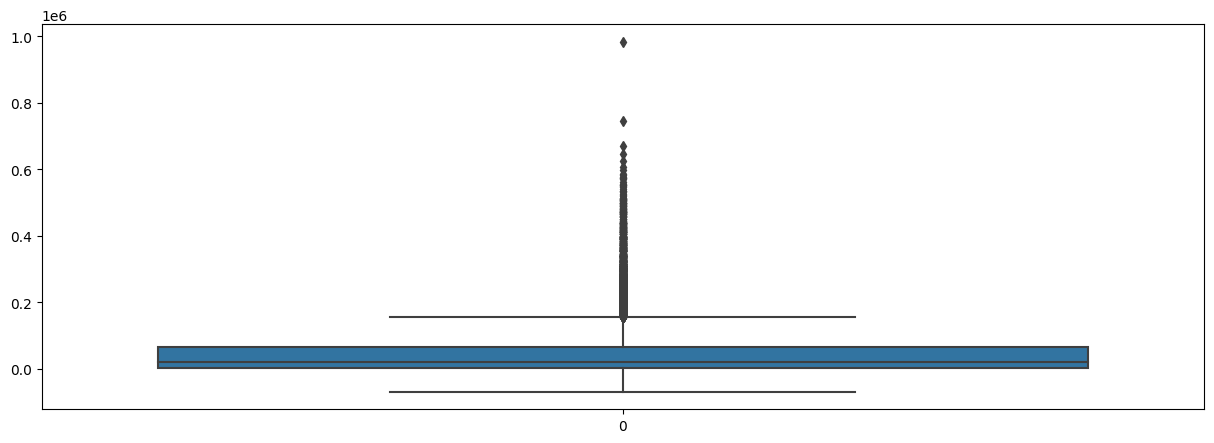

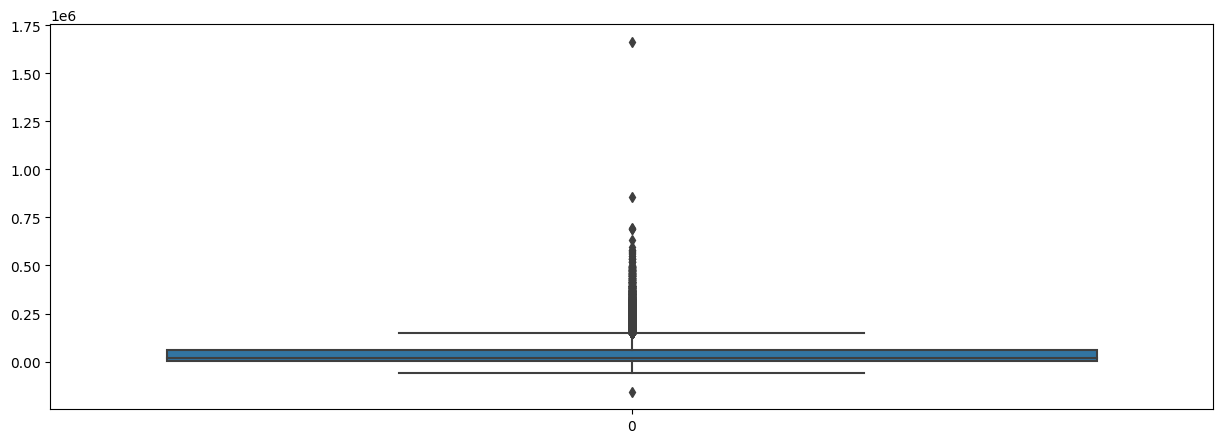

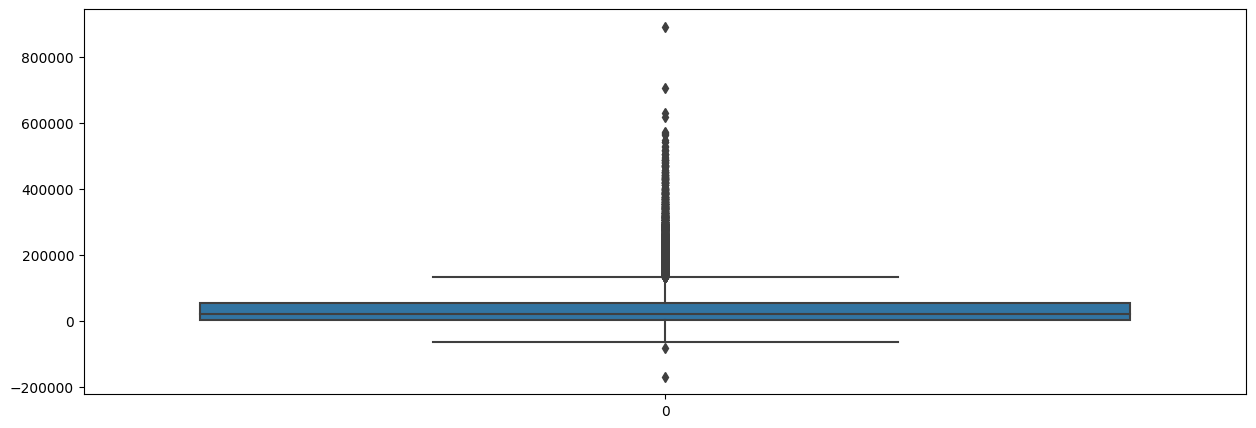

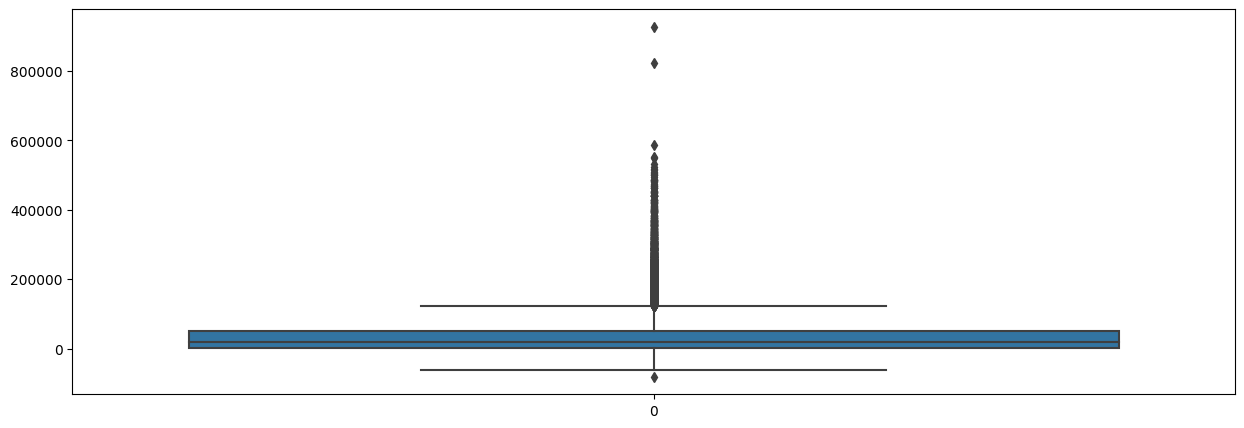

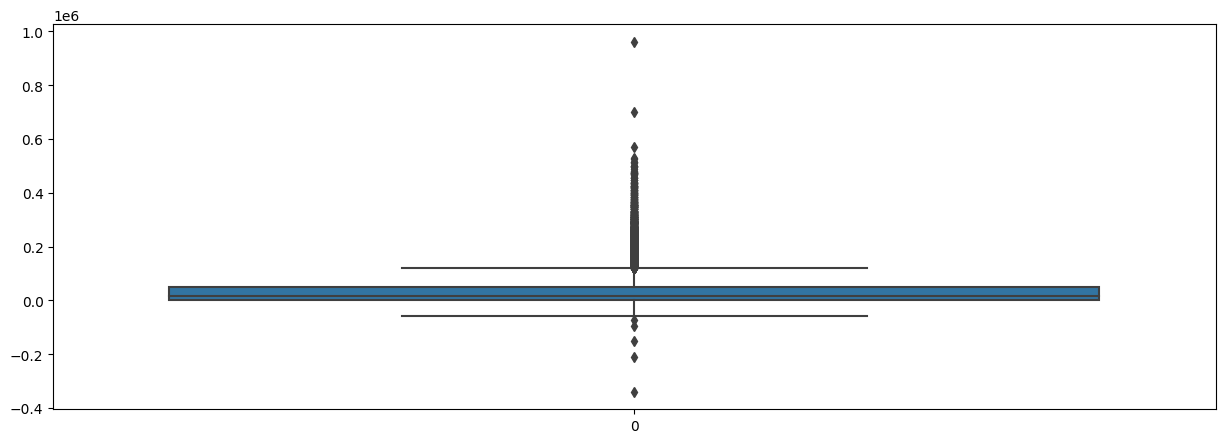

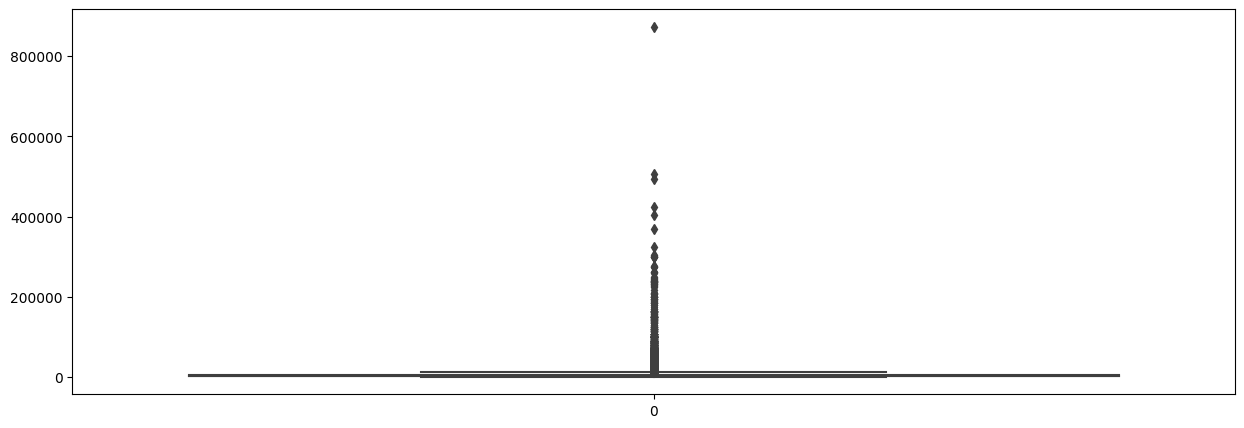

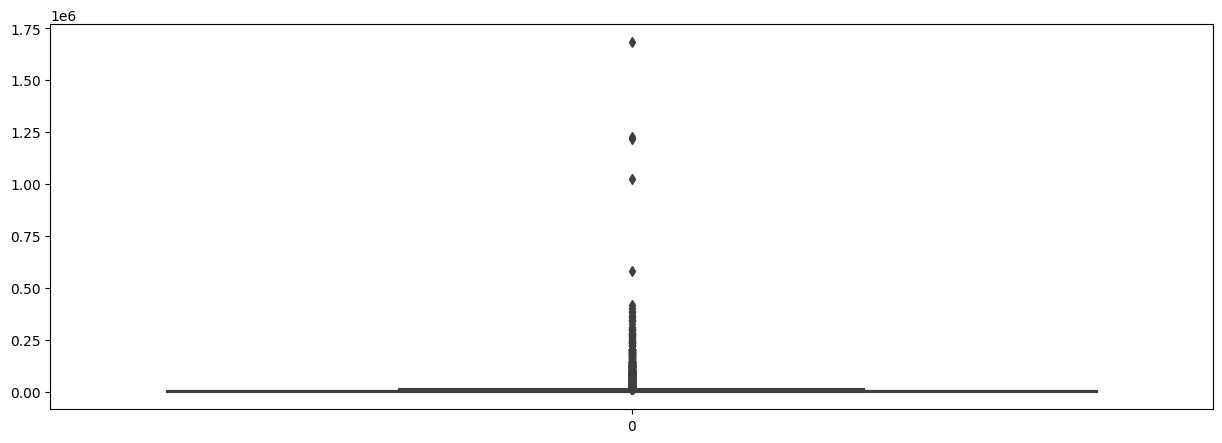

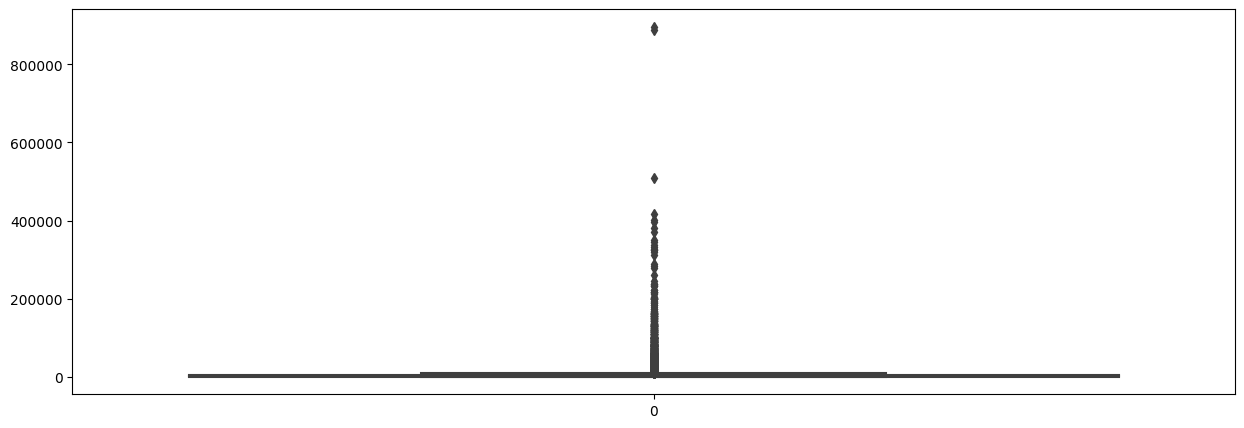

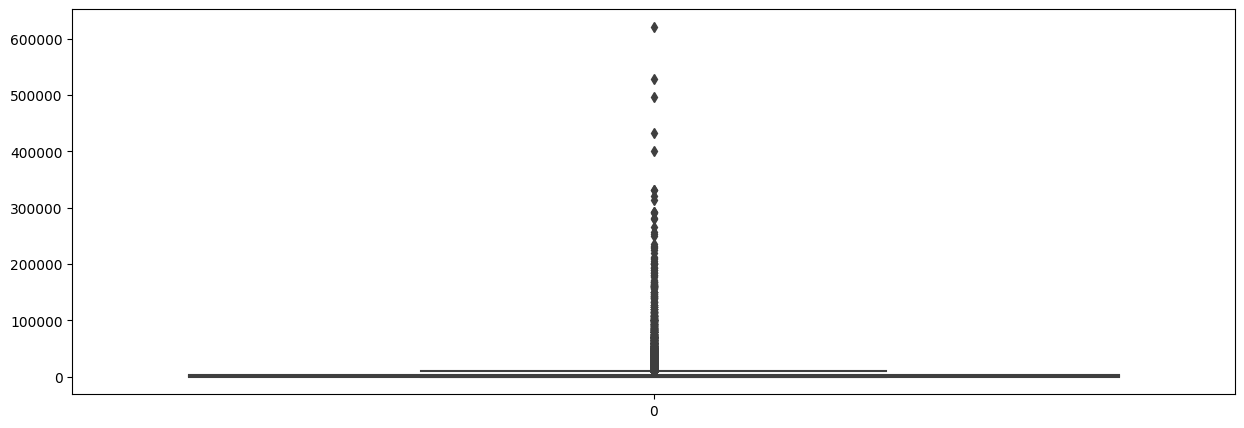

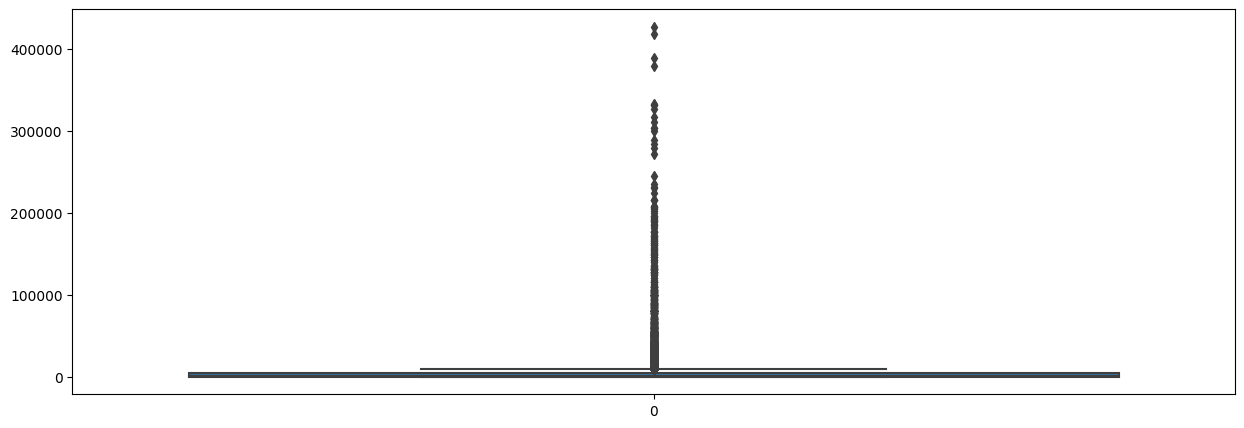

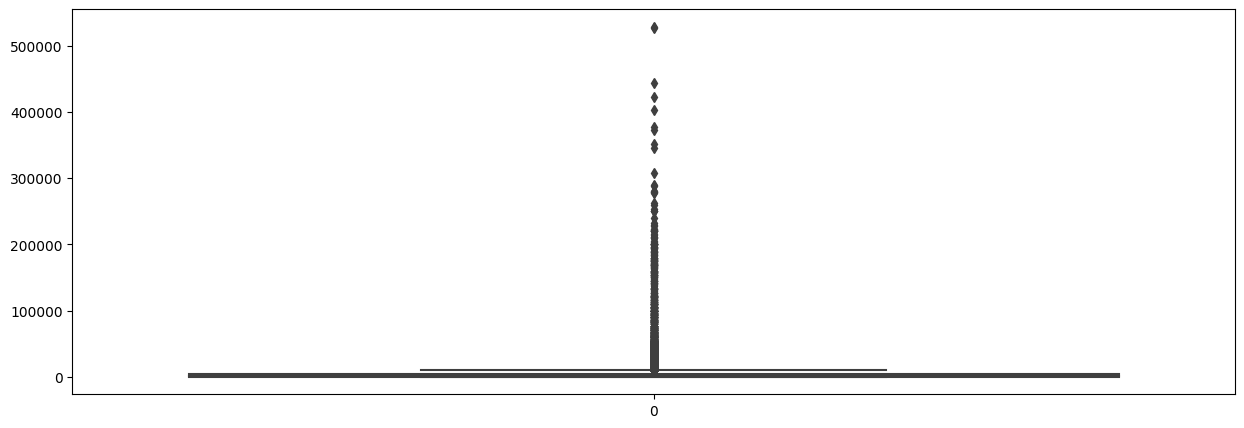

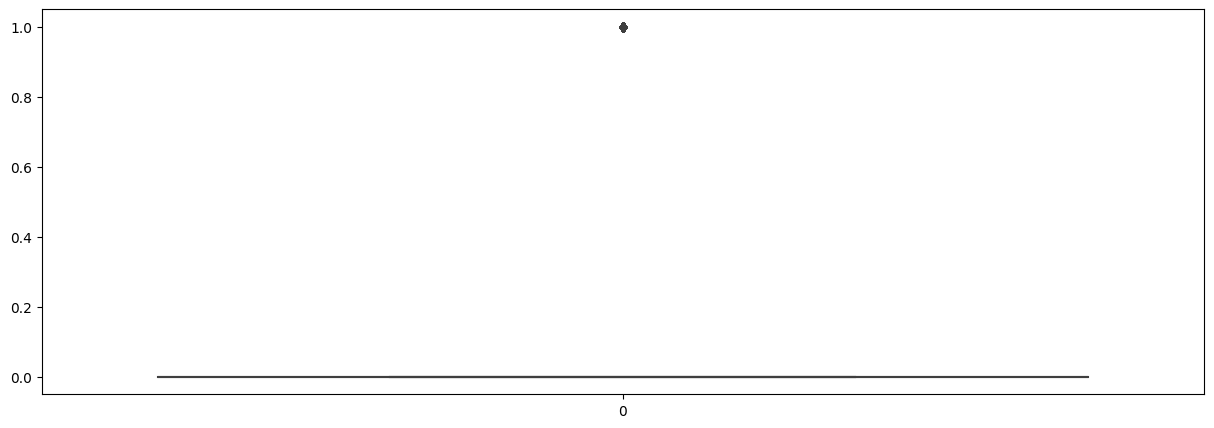

In [32]:
#Checking outliers in dataset using Boxplot
for col in card_data1.columns:
  plt.figure(figsize=(15,5))
  sns.boxplot(card_data1[col])


**Categorical encoding:**

In [33]:
#Encode your categorical columns
sum(card_data1.dtypes==object)


0

There is no categorical values in given data set.

**One hot encoding:**

In [34]:
#Data for Independent variables
X=card_data1.drop(['IsDefaulter'],axis =1)

In [35]:
X.shape

(30000, 23)

In [36]:
X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0      20000    2          2         1   24         2        2       -1   
1     120000    2          2         2   26        -1        2        0   
2      90000    2          2         2   34         0        0        0   
3      50000    2          2         1   37         0        0        0   
4      50000    1          2         1   57        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUL  BILL_AMT_JUN  BILL_AMT_MAY  \
0       -1       -2  ...           689             0             0   
1        0        0  ...          2682          3272          3455   
2        0        0  ...         13559         14331         14948   
3        0        0  ...         49291         28314         28959   
4        0        0  ...         35835         20940         19146   

   BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
0             0             0          689            0            0   
1          3261             0         1000         1000         1000   
2         15549          1518         1500         1000         1000   
3         29547          2000         2019         1200         1100   
4         19131          2000        36681        10000         9000   

   PAY_AMT_MAY  PAY_AMT_APR  
0            0            0  
1            0         2000  
2         1000         5000  
3         1069         1000  
4          689          679  

[5 rows x 23 columns]

In [37]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'],
      dtype='object')

In [38]:
#Data for Dependent Variable
Y=card_data1['IsDefaulter']
Y.shape

(30000,)

**Handling imbalanced dataset:**

In [39]:
#Count of each class in target variable
card_data1['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

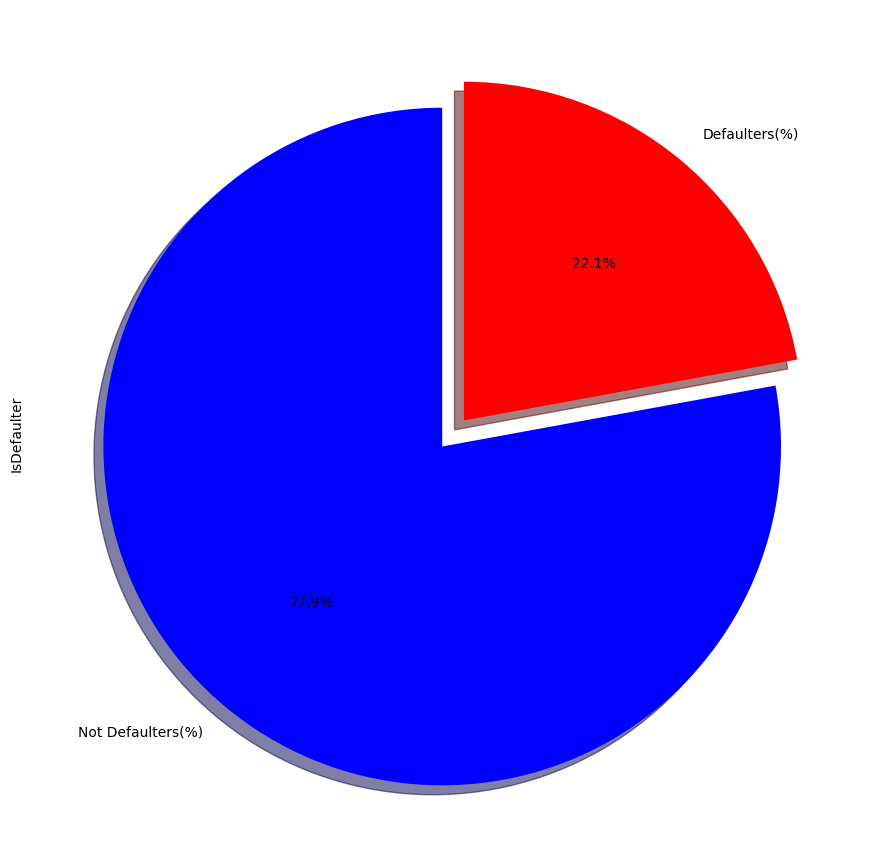

In [40]:
#Visualisation of class imbalance
card_data1['IsDefaulter'].value_counts().plot(kind='pie',
                              figsize=(20,11),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Defaulters(%)','Defaulters(%)'],
                               colors=['blue','red'],
                               explode=[.05,.05]
                              )
plt.show()

From the above pie chart I observed that 77.9% data belongs to not defaulters and 22.1% data belongs to defaulters.So it is clear that our data set is imbalanced.

**Handling imbalanced data with SMOTE:**

In [41]:
#Importing SMOTE 
from imblearn.over_sampling import SMOTE

print('Dataset Before:\n', Y.value_counts())
smt = SMOTE(random_state=40)

# fit predictor and target variable
X_smt, Y_smt = smt.fit_resample(X,Y)

print('\nDataset After:\n',Y_smt.value_counts())
     

Dataset Before:
 0    23364
1     6636
Name: IsDefaulter, dtype: int64

Dataset After:
 1    23364
0    23364
Name: IsDefaulter, dtype: int64


I used the SMOTE for balancing the dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an imbalanced data set. In practice, imbalanced data sets are common and most ML algorithms are highly prone to imbalanced data so we need to improve their performance by using techniques like SMOTE.

**Data Splittting:**

In [42]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, Y_train, Y_test = train_test_split(X_smt,Y_smt,test_size = 0.25, random_state=1)
#Scaling the features for better performance of models.
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
# Show the training and testing Data
#Checking the shape of
print(X_train.shape,Y_train.shape)
# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(35046, 23) (35046,)
(11682, 23) (11682,)


For the train-test split, I utilised an 75:25 ratio. We can see we have 35046 data for training and 11682 testing which is a fair split to start with as we have kept a good amount of data for training our model.

**Machine learning model implementation:**

**Model 1: Logistic Regression**

In [43]:
# lopgistic regression Implementation
logistic_regg=LogisticRegression(fit_intercept=True,max_iter=10000)

#fit the Algorithm
logistic_regg.fit(X_train,Y_train)
     

LogisticRegression(max_iter=10000)

In [44]:
#Cheking model coefficient
logistic_regg.coef_
     

array([[-0.19413366, -0.39766863, -0.39692637, -0.5618979 , -0.10715158,
         0.63088933,  0.08040709,  0.06005583,  0.03479676,  0.08556008,
        -0.02077508, -0.45500402,  0.25991354,  0.14562139,  0.03251891,
        -0.08516932,  0.09039702, -0.23933039, -0.24218148, -0.0741446 ,
        -0.05971813, -0.12480599, -0.06007535]])

In [45]:
# Check the intercept value
logistic_regg.intercept_

array([-0.01936189])

In [46]:
# Getting the predicted probabilities
train_preds = logistic_regg.predict_proba(X_train)
test_preds = logistic_regg.predict_proba(X_test)
     

In [47]:
train_preds

array([[0.51071187, 0.48928813],
       [0.38398881, 0.61601119],
       [0.50437134, 0.49562866],
       ...,
       [0.64503197, 0.35496803],
       [0.49430671, 0.50569329],
       [0.13631024, 0.86368976]])

In [48]:
test_preds

array([[0.33923057, 0.66076943],
       [0.67729302, 0.32270698],
       [0.16209527, 0.83790473],
       ...,
       [0.89983615, 0.10016385],
       [0.65485224, 0.34514776],
       [0.24273639, 0.75726361]])

In [49]:
 #predicting the values of y from x via model
y_pred_test = logistic_regg.predict(X_test)
y_pred_train = logistic_regg.predict(X_train)
     

**1. Explain the ML Model used and it's performance using Evaluation metrics**

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

**EVALUATION METRICS:**

Accuracy : Accuracy = Number of correct predictions Total number of predictions.

Precision : Precision for a label is defined as the number of true positives divided by the number of predicted positives.Precision is a good metric to use when the costs of false positive(FP) is high.

Precision=TP / (TP + FP)

Recall : Recall for a label is defined as the number of true positives divided by the total number of actual positives.Recall is a good metric to use when the cost associated with false negative(FN) is high.

Recall = TP / (TP + FN)

F1-Score : This is defined as the harmonic mean of precision and recall.

AUC-ROC - The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

I will be considering Recall mostly for evaluation of models because False Negative indicate that a person will not default when they actually default. And detecting defaulter customers as non defaulter will lead to huge loss to bank so we have to minimise False Negative and as false negative decrease Recall will increase.



In [50]:
#Visualizing evaluation Metrics
roc=roc_auc_score(Y_test, y_pred_test)
acc = accuracy_score(Y_test, y_pred_test)
prec = precision_score(Y_test, y_pred_test)
rec = recall_score(Y_test,y_pred_test)
f1 = f1_score(Y_test, y_pred_test)

eval_matric = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric
     

Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression   0.71837   0.717358  0.723237  0.720286  0.718357

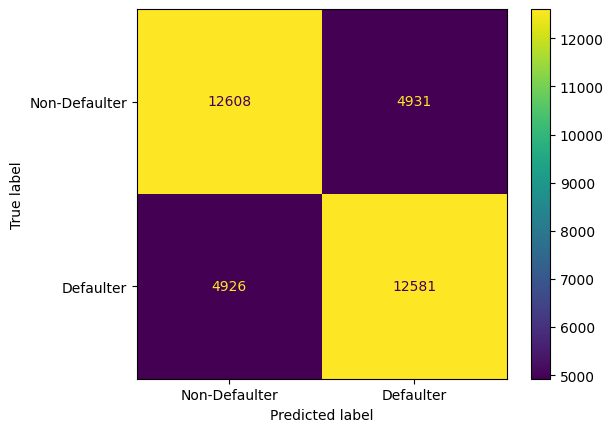

In [51]:
#Confusion metrics for train
cm = metrics.confusion_matrix(Y_train, y_pred_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Defaulter','Defaulter'])
cm_display.plot()
plt.show()

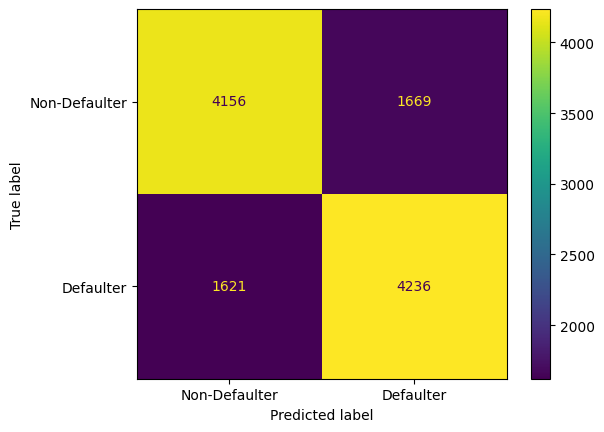

In [52]:
#Confusion metrics for test
cm = confusion_matrix(Y_test, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Defaulter','Defaulter'])
cm_display.plot()
plt.show()

The accuracy of logistic regression model is approximately 71% and precision is 71%

**2.Cross validation and hyperparameter tuning:**

In [53]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic_regg = LogisticRegression()
#Setting the parameters for Cross Validation
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] } 

logistic_regg_cv = GridSearchCV(logistic_regg, param_grid, scoring = 'recall',n_jobs = -1, verbose = 3, cv = 5)
#Fit the Algorithm
logistic_regg_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

In [54]:
#Best parameters
logistic_regg_cv.best_params_
     

{'C': 0.001, 'penalty': 'l2'}

In [55]:
#Best Score
best_recall=logistic_regg_cv.best_score_
print('Recall after Cross Validation is:',best_recall)

Recall after Cross Validation is: 0.7178837049249696


In [56]:
#predicting the values of y from x after CV via model
y_pred_test_cv = logistic_regg_cv.predict(X_test)
y_pred_train_cv = logistic_regg_cv.predict(X_train)

In [57]:
# Visualizing evaluation Metric Score 
roc=roc_auc_score(Y_test, y_pred_test_cv)
acc = accuracy_score(Y_test,y_pred_test_cv)
prec = precision_score(Y_test, y_pred_test_cv)
rec = recall_score(Y_test,y_pred_test_cv)
f1 = f1_score(Y_test, y_pred_test_cv)

eval_matric_cv = pd.DataFrame([['Tuned Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_cv,ignore_index = True)
eval_matric

Model  Accuracy  Precision    Recall  F1 Score  \
0        Logistic Regression  0.718370   0.717358  0.723237  0.720286   
1  Tuned Logistic Regression  0.717685   0.715658  0.724945  0.720271   

        ROC  
0  0.718357  
1  0.717665

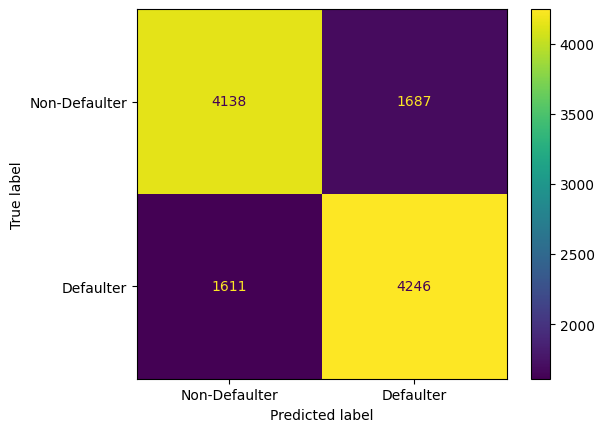

In [58]:
#Confusion matrics for Test
cm = confusion_matrix(Y_test, y_pred_test_cv)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Defaulter','Defaulter'])
cm_display.plot()
plt.show()

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.
From the above analysis we can say that our model is not giving best result after cross validation.

**Model 2:Decision Tree Classifier:**

In [59]:
#The grid search model
dtc=DecisionTreeClassifier(criterion="gini",random_state=100,min_samples_leaf=10,max_depth=10)
dtc.fit(X_train,Y_train)
y_pred_dtc = dtc.predict(X_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Scores**

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.



In [60]:
#Visualizing Evaluation Metric Score chart
roc=roc_auc_score(Y_test, y_pred_dtc)
acc = accuracy_score(Y_test,y_pred_dtc)
prec = precision_score(Y_test, y_pred_dtc)
rec = recall_score(Y_test,y_pred_dtc)
f1 = f1_score(Y_test, y_pred_dtc)

eval_matric_rfc = pd.DataFrame([['Decision Tree classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_rfc,ignore_index = True)
eval_matric

Model  Accuracy  Precision    Recall  F1 Score  \
0        Logistic Regression  0.718370   0.717358  0.723237  0.720286   
1  Tuned Logistic Regression  0.717685   0.715658  0.724945  0.720271   
2   Decision Tree classifier  0.747389   0.760768  0.723749  0.741797   

        ROC  
0  0.718357  
1  0.717665  
2  0.747454

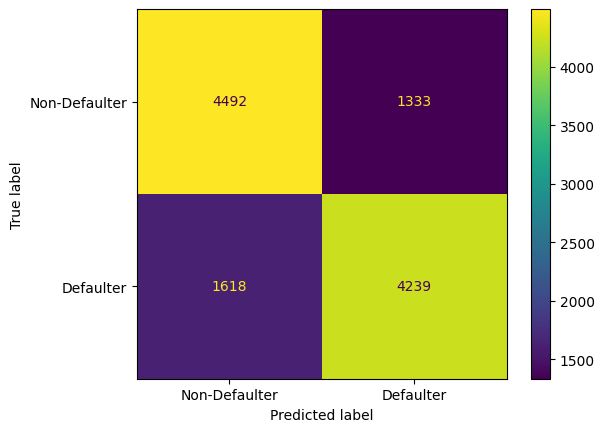

In [61]:
#Confusion metrics for Test
cm_rf= confusion_matrix(Y_test, y_pred_dtc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = ['Non-Defaulter','Defaulter'])
cm_display.plot()
plt.show()

we can see that accuracy of a Decision tree model is 74% , precision is 76%,recall is 72%,F1 score is 74%,ROC is 74%.We will compare the performance after cross validation.

**2.Cross validation and hyperparamter tuning:**

In [62]:
#Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_dtc = {'max_depth': range(5, 15, 5),'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50)}
dtc_cv=GridSearchCV(estimator=dtc,param_grid= param_grid_dtc, scoring='recall',cv=5,verbose=1,n_jobs=-1)
# Fit the Algorithm
dtc_cv.fit(X_train,Y_train)
# Predict on the model
best_recall_dtc=dtc_cv.best_score_
print('Recall after Cross Validation is:',best_recall_dtc)
best_parameters_dtc = dtc_cv.best_params_
print('best parameters are',best_parameters_dtc)
y_pred_dtc = dtc_cv.predict(X_test)
roc=roc_auc_score(Y_test, y_pred_dtc)
acc = accuracy_score(Y_test, y_pred_dtc)
prec = precision_score(Y_test, y_pred_dtc)
rec = recall_score(Y_test, y_pred_dtc)
f1 = f1_score(Y_test, y_pred_dtc)
eval_matric_dtc_cv=  pd.DataFrame([[' Tuned Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric= eval_matric.append(eval_matric_dtc_cv, ignore_index = True)
eval_matric

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Recall after Cross Validation is: 0.7092014992534563
best parameters are {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


Model  Accuracy  Precision    Recall  F1 Score  \
0        Logistic Regression  0.718370   0.717358  0.723237  0.720286   
1  Tuned Logistic Regression  0.717685   0.715658  0.724945  0.720271   
2   Decision Tree classifier  0.747389   0.760768  0.723749  0.741797   
3        Tuned Decision Tree  0.745677   0.769518  0.703432  0.734992   

        ROC  
0  0.718357  
1  0.717665  
2  0.747454  
3  0.745793

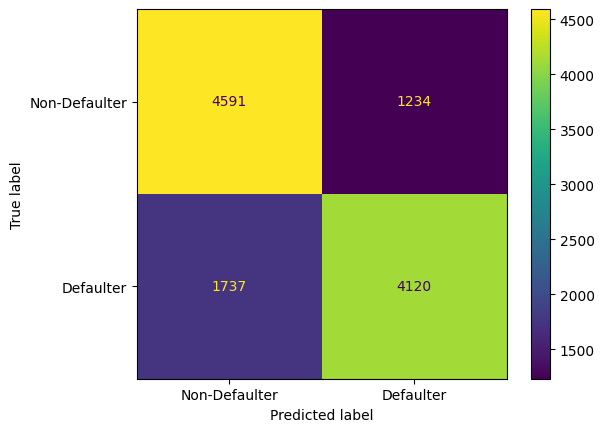

In [63]:
#Confusion metrics for Test
cm_dtc_cv= confusion_matrix(Y_test, y_pred_dtc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_dtc_cv, display_labels = ['Non-Defaulter','Defaulter'])
cm_display.plot()
plt.show()

From the above analysis we can say that our model is not giving best result after cross validation.

**Model 3: K- Nearest Neighbors:**

In [64]:
#  Model Implementation
knn = KNeighborsClassifier(n_neighbors=7)
# Fit the Algorithm
knn.fit(X_train,Y_train)
# Predict on the model
y_pred_knn_test=knn.predict(X_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Scores**

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.



In [65]:
# Visualizing Evaluation Metric Scores
roc=roc_auc_score(Y_test, y_pred_knn_test)
acc = accuracy_score(Y_test,y_pred_knn_test)
prec = precision_score(Y_test, y_pred_knn_test)
rec = recall_score(Y_test,y_pred_knn_test)
f1 = f1_score(Y_test,y_pred_knn_test)

eval_matric_knn = pd.DataFrame([['K-Nearest  Neighbors', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_knn,ignore_index = True)
eval_matric

Model  Accuracy  Precision    Recall  F1 Score  \
0        Logistic Regression  0.718370   0.717358  0.723237  0.720286   
1  Tuned Logistic Regression  0.717685   0.715658  0.724945  0.720271   
2   Decision Tree classifier  0.747389   0.760768  0.723749  0.741797   
3        Tuned Decision Tree  0.745677   0.769518  0.703432  0.734992   
4       K-Nearest  Neighbors  0.753210   0.742815  0.776677  0.759369   

        ROC  
0  0.718357  
1  0.717665  
2  0.747454  
3  0.745793  
4  0.753146

Here we observe that accuracy of KNN is 75%,Precision is 74%,recall is 77%,F1 score is 75% and ROC is 75%.we will check the performance after cross validation.

**2.Cross validation and hyperparameter tuning:**

In [66]:
#Model  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_knn = {'n_neighbors':np.arange(1,30)}
#fit the Algorithm
knn_cv=GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='recall', n_jobs = -1, verbose = 3, cv = 3)
knn_cv.fit(X_train,Y_train)
     

Fitting 3 folds for each of 29 candidates, totalling 87 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='recall', verbose=3)

In [67]:
#Best Parameters
knn_cv.best_params_
     

{'n_neighbors': 1}

A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.

In [68]:
#Best Recall After CV
knn_cv.best_score_
     

0.7804878621774373

In [69]:
#Prediction
y_pred_knn_cv=knn_cv.predict(X_test)

In [70]:
#Visualizing evaluation Metric Scores
roc=roc_auc_score(Y_test, y_pred_knn_cv)
acc = accuracy_score(Y_test,y_pred_knn_cv)
prec = precision_score(Y_test, y_pred_knn_cv)
rec = recall_score(Y_test,y_pred_knn_cv)
f1 = f1_score(Y_test,y_pred_knn_cv)

eval_matric_knn_cv = pd.DataFrame([['Tuned K-Nearest  Neighbors', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_knn_cv,ignore_index = True)
eval_matric
     

Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.718370   0.717358  0.723237  0.720286   
1   Tuned Logistic Regression  0.717685   0.715658  0.724945  0.720271   
2    Decision Tree classifier  0.747389   0.760768  0.723749  0.741797   
3         Tuned Decision Tree  0.745677   0.769518  0.703432  0.734992   
4        K-Nearest  Neighbors  0.753210   0.742815  0.776677  0.759369   
5  Tuned K-Nearest  Neighbors  0.763225   0.741296  0.810654  0.774425   

        ROC  
0  0.718357  
1  0.717665  
2  0.747454  
3  0.745793  
4  0.753146  
5  0.763095

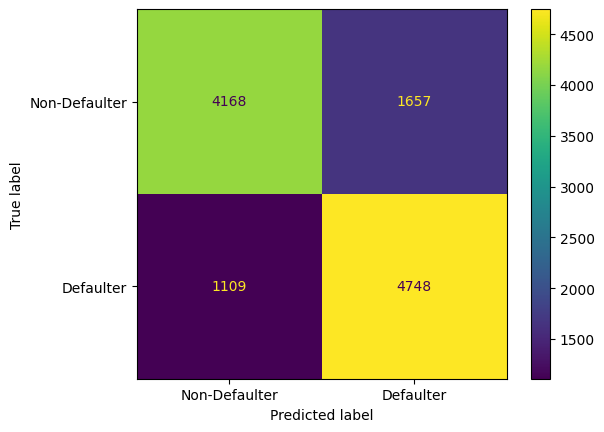

In [71]:
#Confusion metrics for Test
cm_knn_cv= confusion_matrix(Y_test, y_pred_knn_cv)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn_cv, display_labels = ['Non-Defaulter','Defaulter'])
cm_display.plot()
plt.show()
     

After cross validation the evaluation metrics of the model are improved.After cross validation accuracy becomes 76%,precision is 74%,Recall is 81%,F1 score is77%,ROC is 76%.

**Model 4: XGboost:**

In [72]:
#Implementing the Model
xgboost_model=XGBClassifier()
#fit the Algorithm
xgboost_model.fit(X_train,Y_train)
#Predict on the model
y_pred_xgb=xgboost_model.predict(X_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Scores**

In [73]:
#Visualizing evaluation Metric Scores
roc=roc_auc_score(Y_test, y_pred_xgb)
acc = accuracy_score(Y_test, y_pred_xgb)
prec = precision_score(Y_test,y_pred_xgb)
rec = recall_score(Y_test, y_pred_xgb)
f1 = f1_score(Y_test, y_pred_xgb)

eval_matric_xgb = pd.DataFrame([['XGboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_xgb,ignore_index = True)
eval_matric
     


Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.718370   0.717358  0.723237  0.720286   
1   Tuned Logistic Regression  0.717685   0.715658  0.724945  0.720271   
2    Decision Tree classifier  0.747389   0.760768  0.723749  0.741797   
3         Tuned Decision Tree  0.745677   0.769518  0.703432  0.734992   
4        K-Nearest  Neighbors  0.753210   0.742815  0.776677  0.759369   
5  Tuned K-Nearest  Neighbors  0.763225   0.741296  0.810654  0.774425   
6                     XGboost  0.822034   0.837081  0.800922  0.818602   

        ROC  
0  0.718357  
1  0.717665  
2  0.747454  
3  0.745793  
4  0.753146  
5  0.763095  
6  0.822092

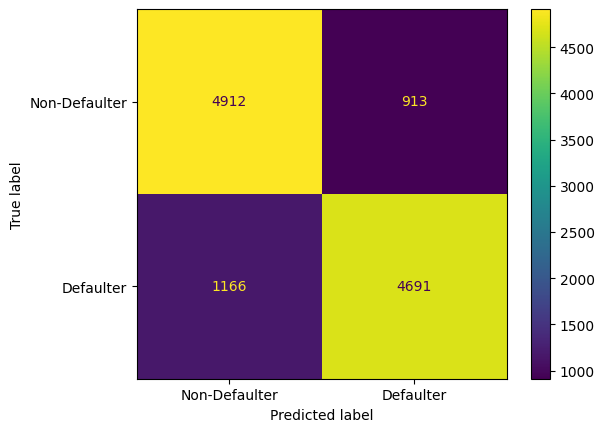

In [74]:
#Confusion metrics for Test
cm_xgb= confusion_matrix(Y_test, y_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = ['Non-Defaulter','Defaulter'])
cm_display.plot()
plt.show()

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.
Here we can see accuracy is 82%,Precision 83%,Recall is 80%,F1 score is 81% and ROC is 82%.

**2.Cross validation and hyperparameter tuning:**

In [75]:
#ModelImplementation with hyperparameter optimization techniques 
params_grid_xgb={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
xgb_cv=RandomizedSearchCV(estimator=xgboost_model,param_distributions=params_grid_xgb,cv=5,scoring='recall',verbose=5,n_jobs=-1)
#fit the Algorithm
xgb_cv.fit(X_train,Y_train)
#Predict the model
y_pred_xgb_cv=xgb_cv.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [76]:
#Best parameters
xgb_cv.best_params_

{'n_estimators': 150, 'max_depth': 9}

In [77]:
#Best score
xgb_cv.best_score_
     

0.8222421561531494

In [78]:
#Visualizing evaluation Metrics Scores
roc=roc_auc_score(Y_test, y_pred_xgb_cv)
acc = accuracy_score(Y_test, y_pred_xgb_cv)
prec = precision_score(Y_test,y_pred_xgb_cv)
rec = recall_score(Y_test, y_pred_xgb_cv)
f1 = f1_score(Y_test, y_pred_xgb_cv)

eval_matric_xgb_cv = pd.DataFrame([['Tuned XGboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_xgb_cv,ignore_index = True)
eval_matric
     

Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.718370   0.717358  0.723237  0.720286   
1   Tuned Logistic Regression  0.717685   0.715658  0.724945  0.720271   
2    Decision Tree classifier  0.747389   0.760768  0.723749  0.741797   
3         Tuned Decision Tree  0.745677   0.769518  0.703432  0.734992   
4        K-Nearest  Neighbors  0.753210   0.742815  0.776677  0.759369   
5  Tuned K-Nearest  Neighbors  0.763225   0.741296  0.810654  0.774425   
6                     XGboost  0.822034   0.837081  0.800922  0.818602   
7               Tuned XGboost  0.842493   0.850096  0.832679  0.841297   

        ROC  
0  0.718357  
1  0.717665  
2  0.747454  
3  0.745793  
4  0.753146  
5  0.763095  
6  0.822092  
7  0.842520

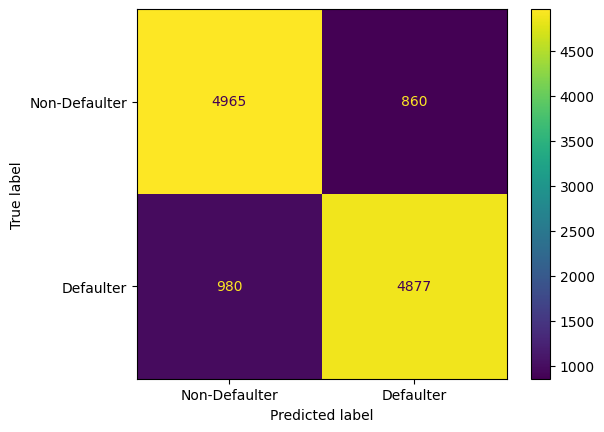

In [79]:
#Confusion metrics for Test
cm_xgb_cv = metrics.confusion_matrix(Y_test, y_pred_xgb_cv)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_xgb_cv, display_labels = ['Non-Defaulter','Defaulter'])
cm_display.plot()
plt.show()

After cross validation the performance of the XGboost model has been improved.

The accuracy is 84%,precision is 85%,Recall is 83%,F1 score is 84% and ROC is 84%

**Model 5:Random Forest Classifier**

In [80]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,Y_train)
y_pred_rcf = rfc.predict(X_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Scores**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting



In [81]:
#Visualizing evaluation Metrics Scores
roc=roc_auc_score(Y_test, y_pred_rcf)
acc = accuracy_score(Y_test,y_pred_rcf)
prec = precision_score(Y_test, y_pred_rcf)
rec = recall_score(Y_test,y_pred_rcf)
f1 = f1_score(Y_test, y_pred_rcf)

eval_matric_rfc = pd.DataFrame([['Random Forest classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_rfc,ignore_index = True)
eval_matric


Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.718370   0.717358  0.723237  0.720286   
1   Tuned Logistic Regression  0.717685   0.715658  0.724945  0.720271   
2    Decision Tree classifier  0.747389   0.760768  0.723749  0.741797   
3         Tuned Decision Tree  0.745677   0.769518  0.703432  0.734992   
4        K-Nearest  Neighbors  0.753210   0.742815  0.776677  0.759369   
5  Tuned K-Nearest  Neighbors  0.763225   0.741296  0.810654  0.774425   
6                     XGboost  0.822034   0.837081  0.800922  0.818602   
7               Tuned XGboost  0.842493   0.850096  0.832679  0.841297   
8    Random Forest classifier  0.840524   0.850967  0.826703  0.838659   

        ROC  
0  0.718357  
1  0.717665  
2  0.747454  
3  0.745793  
4  0.753146  
5  0.763095  
6  0.822092  
7  0.842520  
8  0.840562

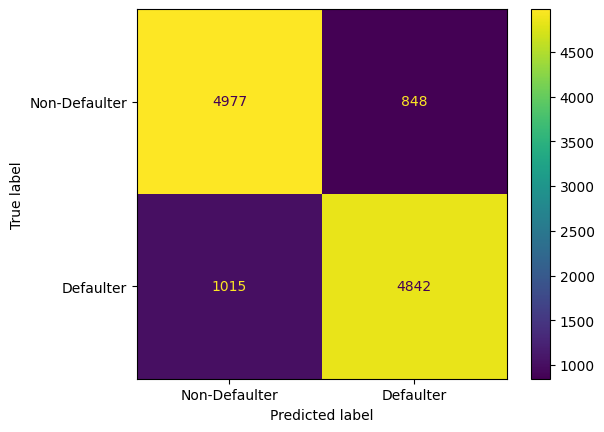

In [82]:
#Confusion metrics for Test
cm_rf= confusion_matrix(Y_test, y_pred_rcf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = ['Non-Defaulter','Defaulter'])
cm_display.plot()
plt.show()

Here I observed that accuracy of Random Forest model is 84%,precision is 85%,Recall is 82%,F1 score is 83% and ROC is 84%.

**2.Cross validation and hyperparameter tuning:**

In [83]:
#Model Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_rf = {'n_estimators': [25,50,75,100], 'min_samples_split': [2,3,4], 'min_samples_leaf': [2,3,5],  'max_depth': [10,20,30,40], 'criterion': ['entropy', 'gini']}
rfc_cv=RandomizedSearchCV(estimator=rfc,param_distributions= param_grid_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)
# Fit the Algorithm
rfc_cv.fit(X_train,Y_train)
# Predict on the model
best_recall_rfc=rfc_cv.best_score_
print('Recall after Cross Validation is:',best_recall_rfc)
best_parameters_rfc = rfc_cv.best_params_
print('best parameters are',best_parameters_rfc)
y_pred_rfc = rfc_cv.predict(X_test)
roc=roc_auc_score(Y_test, y_pred_rfc)
acc = accuracy_score(Y_test, y_pred_rfc)
prec = precision_score(Y_test, y_pred_rfc)
rec = recall_score(Y_test, y_pred_rfc)
f1 = f1_score(Y_test, y_pred_rfc)
eval_matric_rfc_cv=  pd.DataFrame([[' Tuned Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric= eval_matric.append(eval_matric_rfc_cv, ignore_index = True)
eval_matric

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Recall after Cross Validation is: 0.8035639649991492
best parameters are {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'gini'}


Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.718370   0.717358  0.723237  0.720286   
1   Tuned Logistic Regression  0.717685   0.715658  0.724945  0.720271   
2    Decision Tree classifier  0.747389   0.760768  0.723749  0.741797   
3         Tuned Decision Tree  0.745677   0.769518  0.703432  0.734992   
4        K-Nearest  Neighbors  0.753210   0.742815  0.776677  0.759369   
5  Tuned K-Nearest  Neighbors  0.763225   0.741296  0.810654  0.774425   
6                     XGboost  0.822034   0.837081  0.800922  0.818602   
7               Tuned XGboost  0.842493   0.850096  0.832679  0.841297   
8    Random Forest classifier  0.840524   0.850967  0.826703  0.838659   
9         Tuned Random Forest  0.828882   0.838897  0.815264  0.826911   

        ROC  
0  0.718357  
1  0.717665  
2  0.747454  
3  0.745793  
4  0.753146  
5  0.763095  
6  0.822092  
7  0.842520  
8  0.840562  
9  0.828919

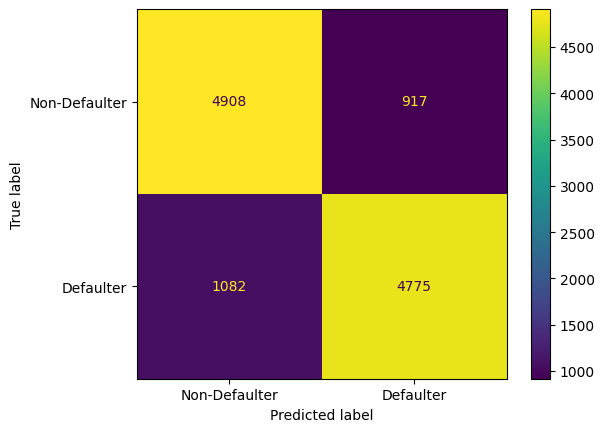

In [84]:
#Confusion matrics for Test
cm_rf_cv= confusion_matrix(Y_test, y_pred_rfc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf_cv, display_labels = ['Non-Defaulter','Defaulter'])
cm_display.plot()
plt.show()

Initially i have used Gridsearch Cv but it took too much time to excute thats why i have used Randomsearch CV.

Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model

Performance of model doesn't improved after cross validation so we can say that our base model was performing good with Recall of 82%.